In [1]:
import numpy as np
import pandas as pd
import os
import sys
import glob
import tqdm
from typing import List

sys.path.append("..")
from src import text_extraction, create_sentence_nace_code_similarities
import analysis_functions
import test_base

## Test retrieving the similarities for chunks in a pdf to the NACE Code

**Function:** pdf-> (chunk x code -> [-1,1])

**Parameters:** 

- pdf_path
- way of chunking the text (e.g. sentences, sliding window, or paragraphs)
- way of preprocessing (most is fixed for all reports)
    - similarity threshold of relevant chunks
    - length of irrelevant chunks

**Store analytics for each datapoint:**

- mean score for each class given a threshold

In [2]:
# Parameters: 

threshold_min_chunk_len = 10
cos_threshold = 0.4

result_path = f"../results/paragraphs_min_chunk_len_{threshold_min_chunk_len}_cos_thresh_{cos_threshold}_german_reports"

In [3]:
dataset_path = "../data/german_annual_reports"

In [4]:
nace_classes = pd.read_csv(os.path.join(dataset_path, "data.csv"))
report_to_nace_class = nace_classes.set_index('report').to_dict()[" NACE"]

In [5]:
reports_path = glob.glob(os.path.join(dataset_path, "*.pdf"))

In [6]:
def preprocess_report(pdf_path: str) -> List[str]:
    chunks = text_extraction.get_paragraphs(pdf_path) 
    chunks = [text_extraction.preprocess_text(chunk) for chunk in chunks]
    chunks = list(dict.fromkeys(chunks))
    return chunks

In [7]:
def shorten_csv(df: pd.DataFrame) -> pd.DataFrame: 
    df = df.drop(columns="Embeddings")

    # For all columns except the first, keep only the 100 highest scores, set the rest to NaN
    for col in df.columns[1:]:
        top_100_idx = df[col].nlargest(100).index
        df.loc[~df.index.isin(top_100_idx), col] = np.nan
    df = df[df.iloc[:,1:].apply(lambda x: not pd.isna(x).all(), axis=1)]
    return df

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/test/../analysis_functions.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/test/../analysis_functions.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
 10%|█         | 1/10 [00:55<08:22, 55.84s/it]/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_topic_analysis_3/test/../analysis_functions.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_temp.columns, rotation=90)
/Users/hendrikweichel/projects/NaceCodeClassification/nace_report_

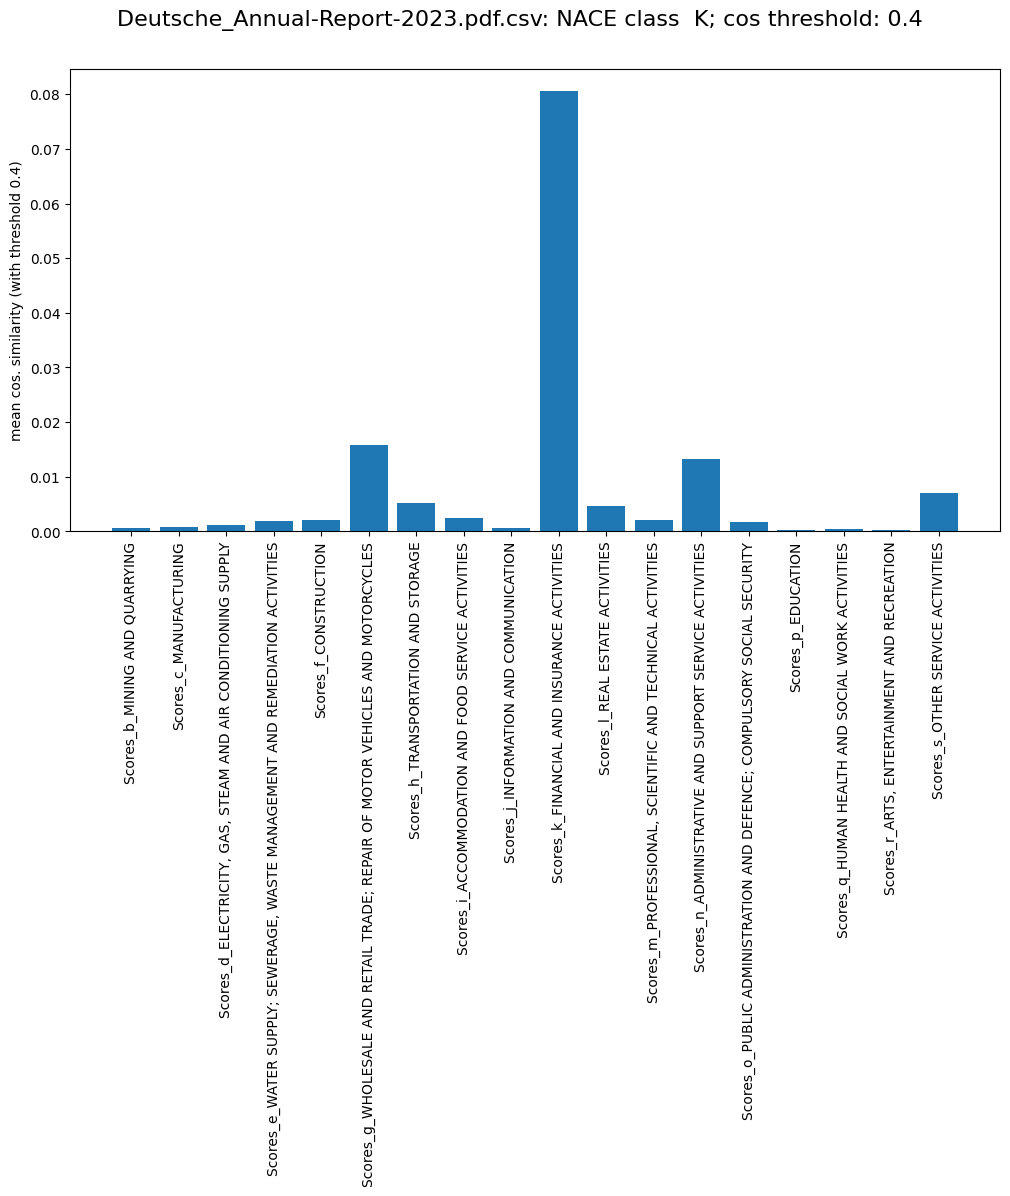

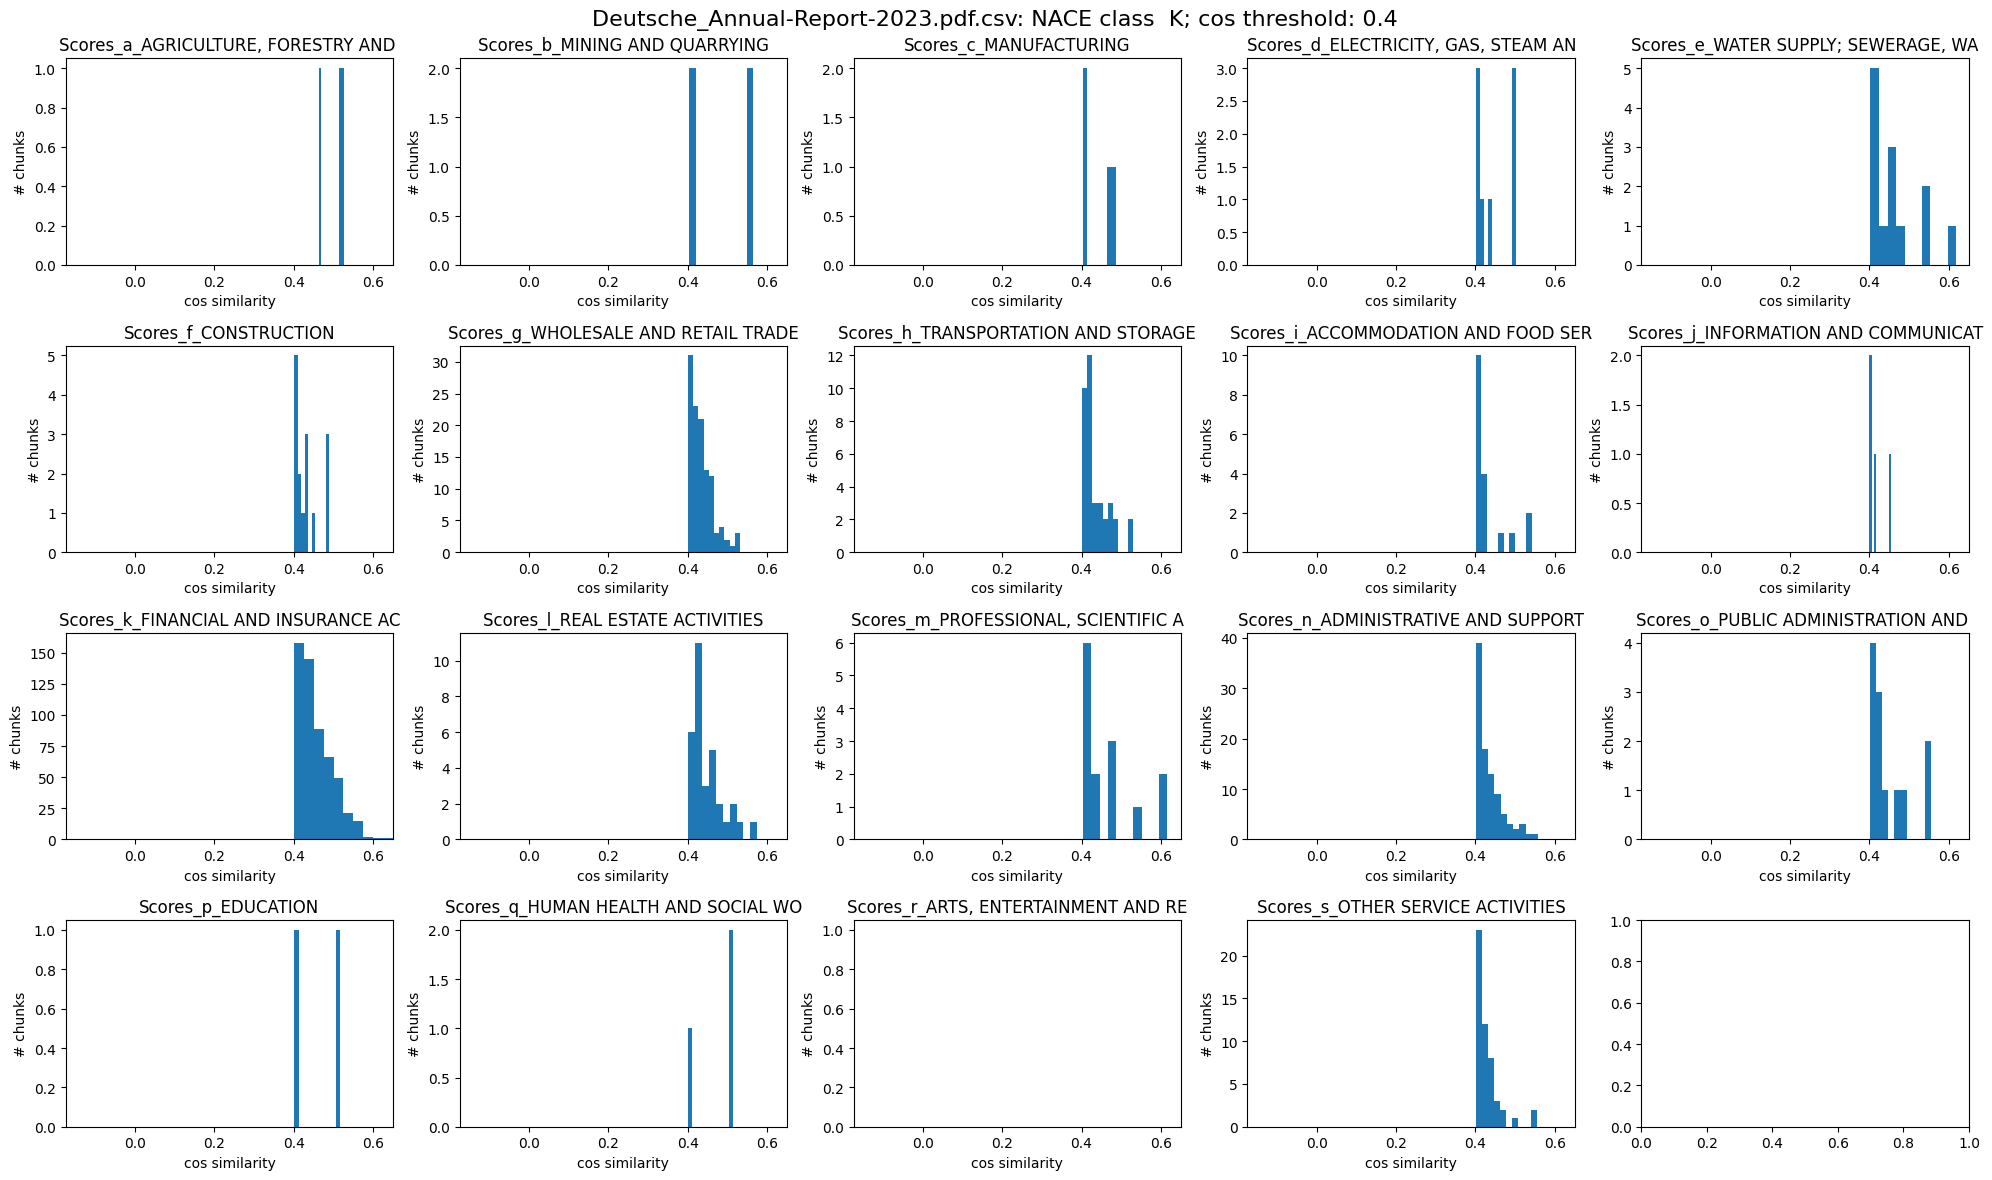

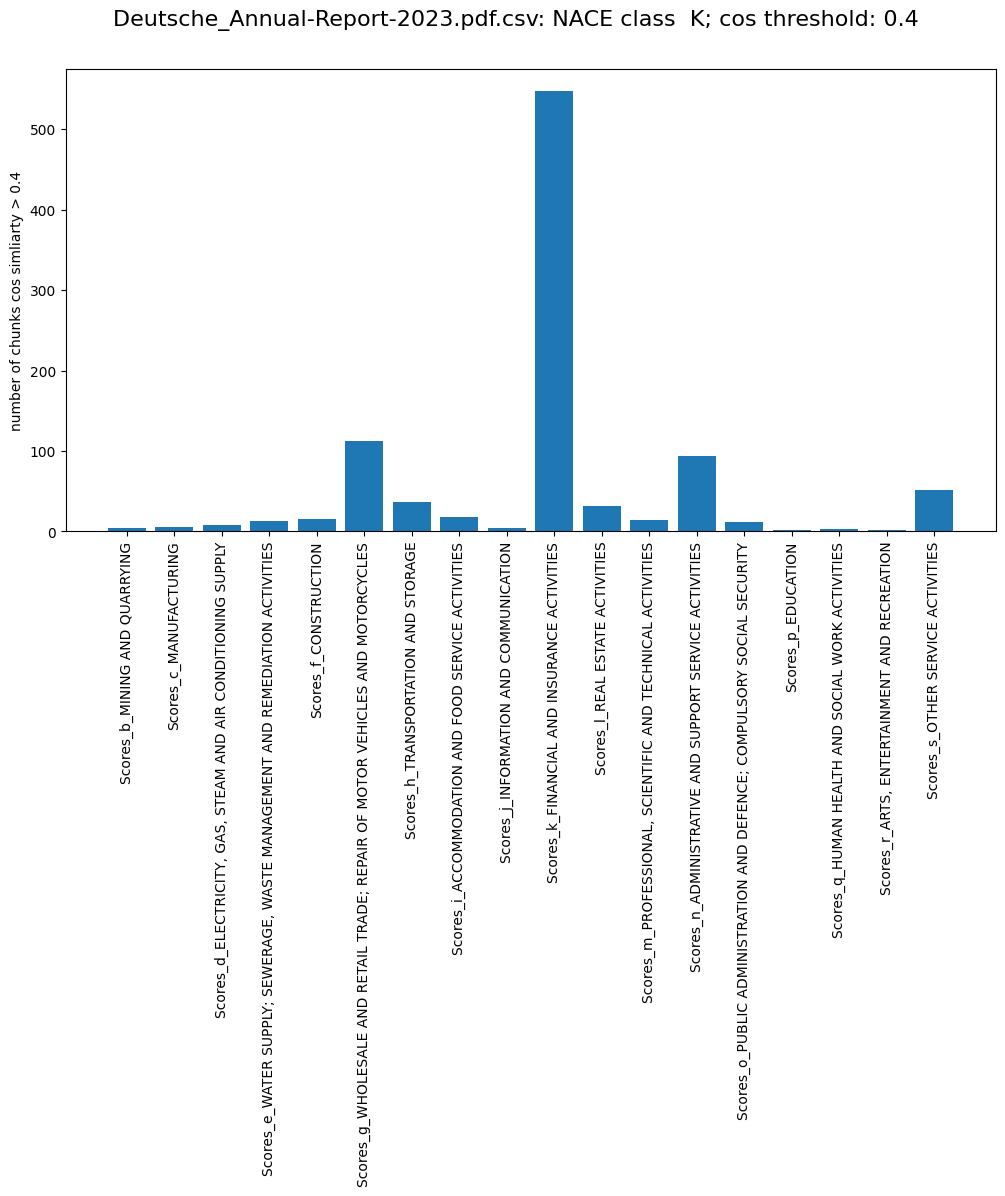

/Users/hendrikweichel/miniconda3/envs/remedi/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


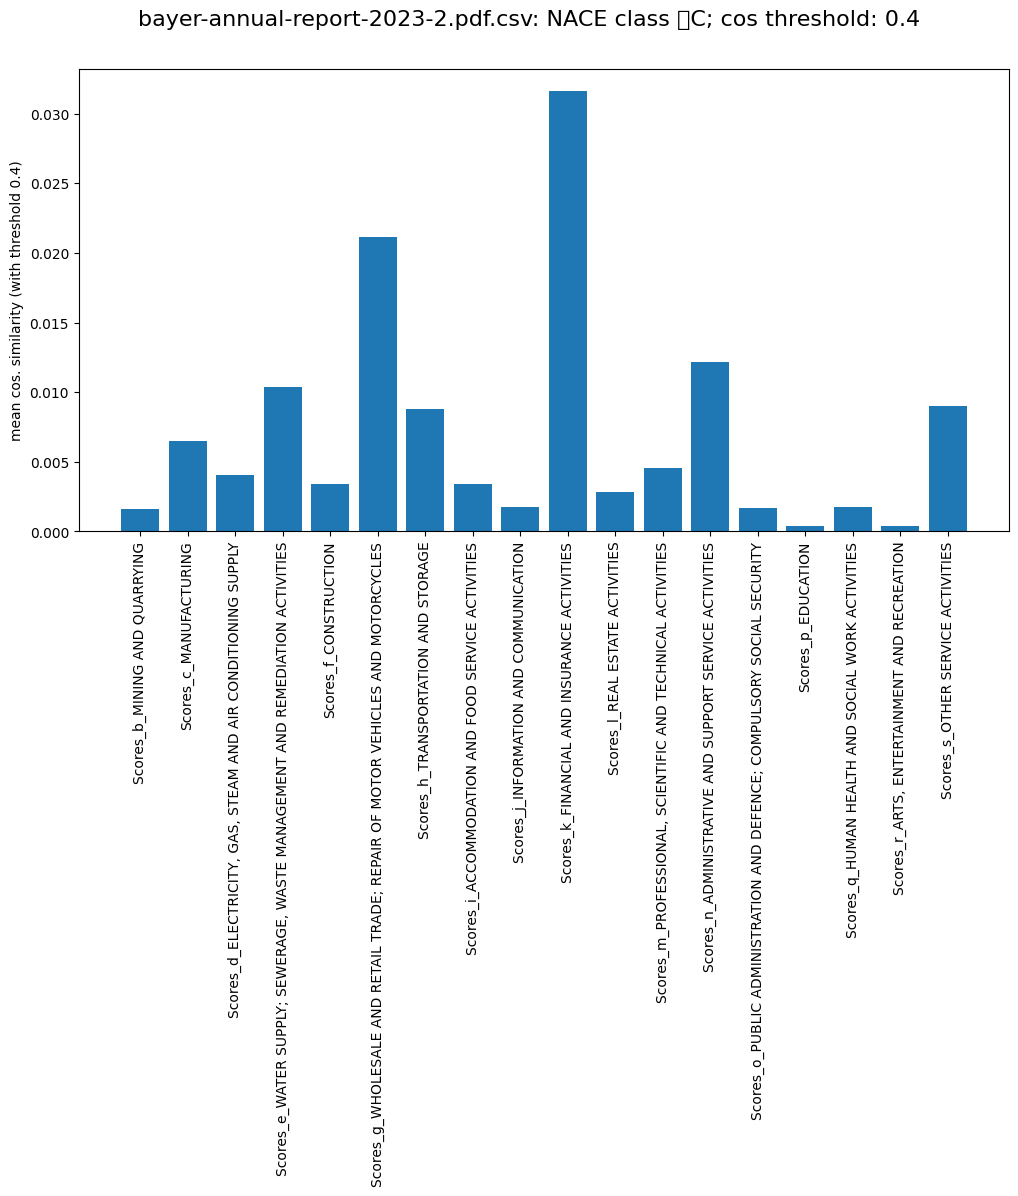

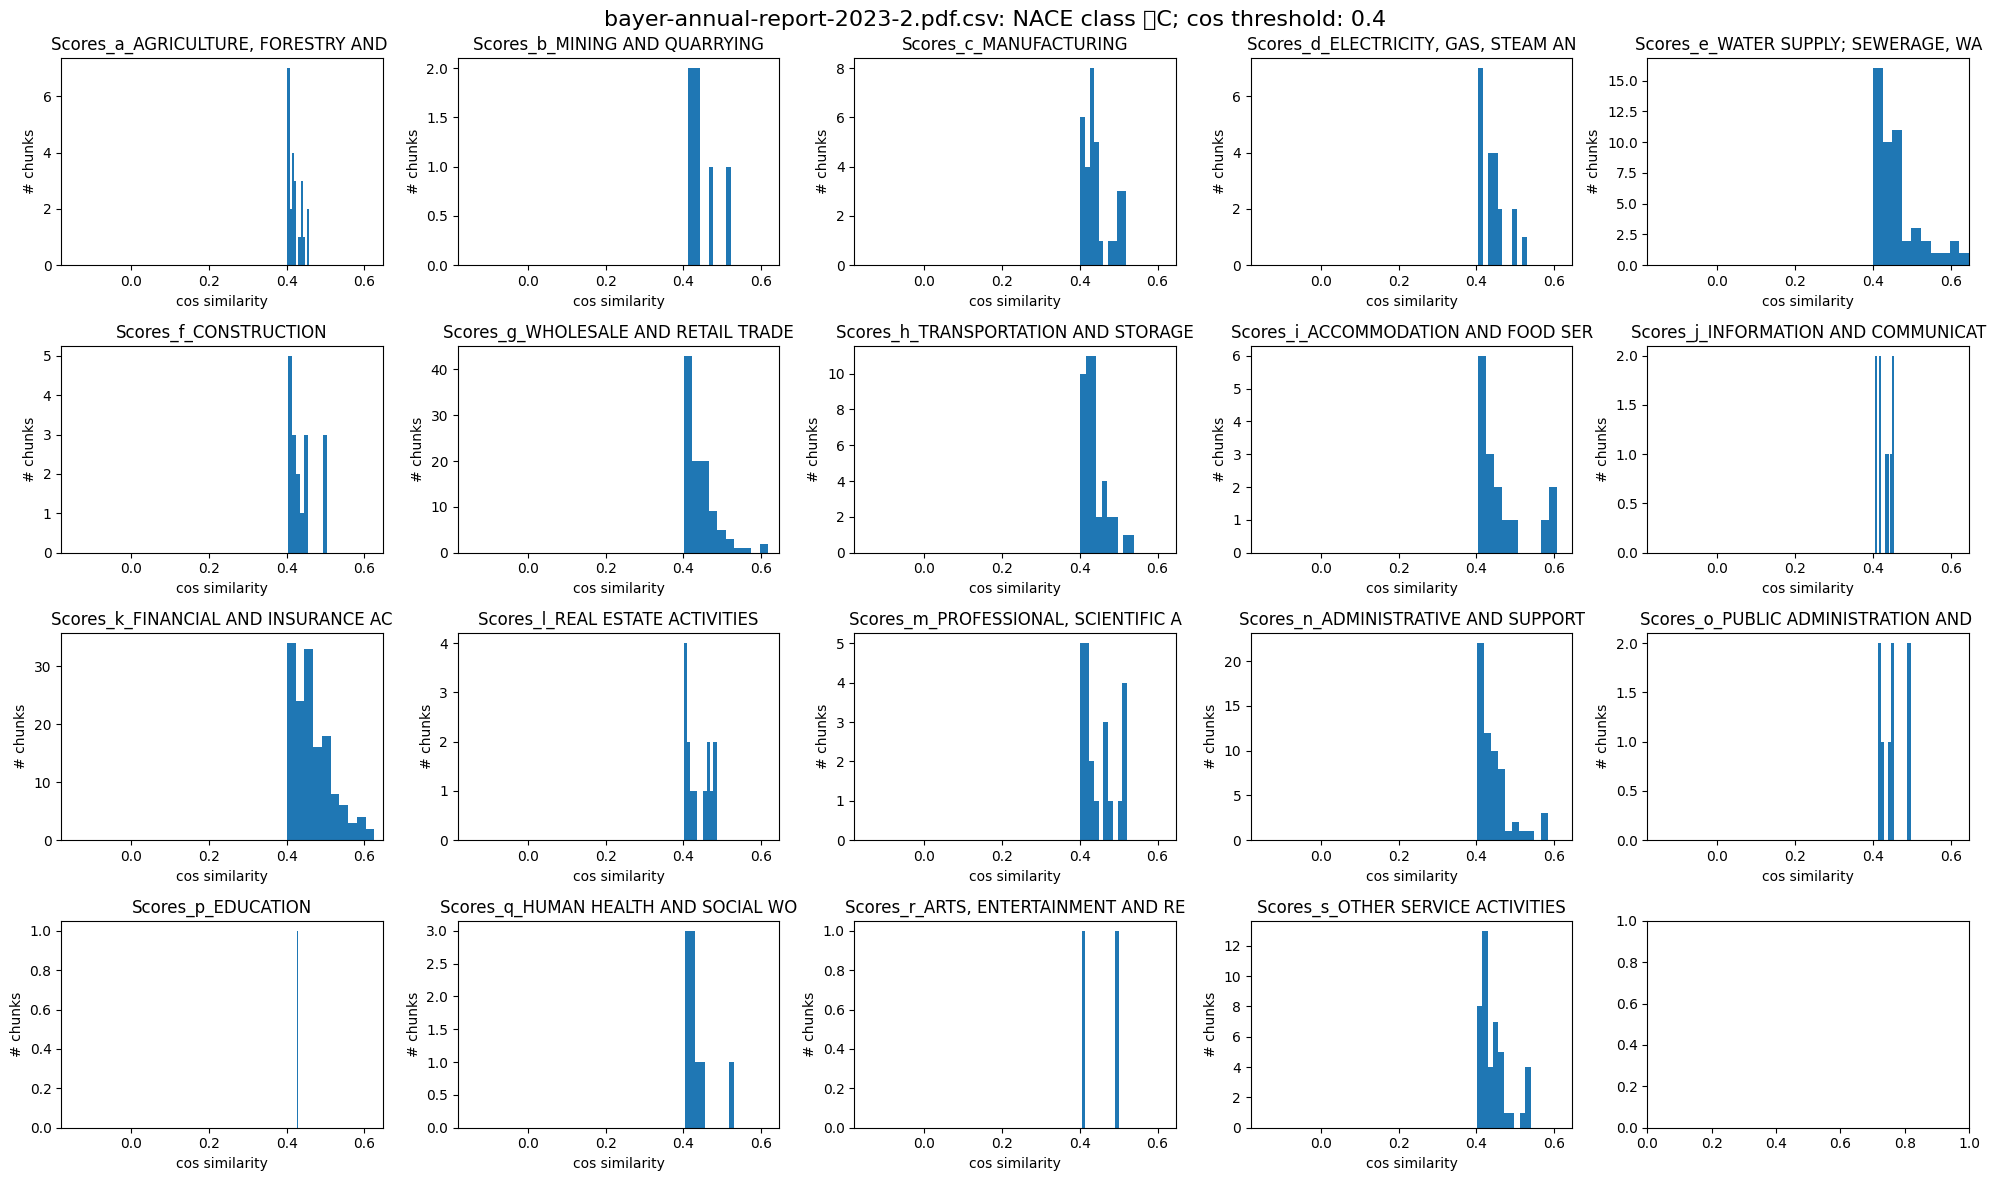

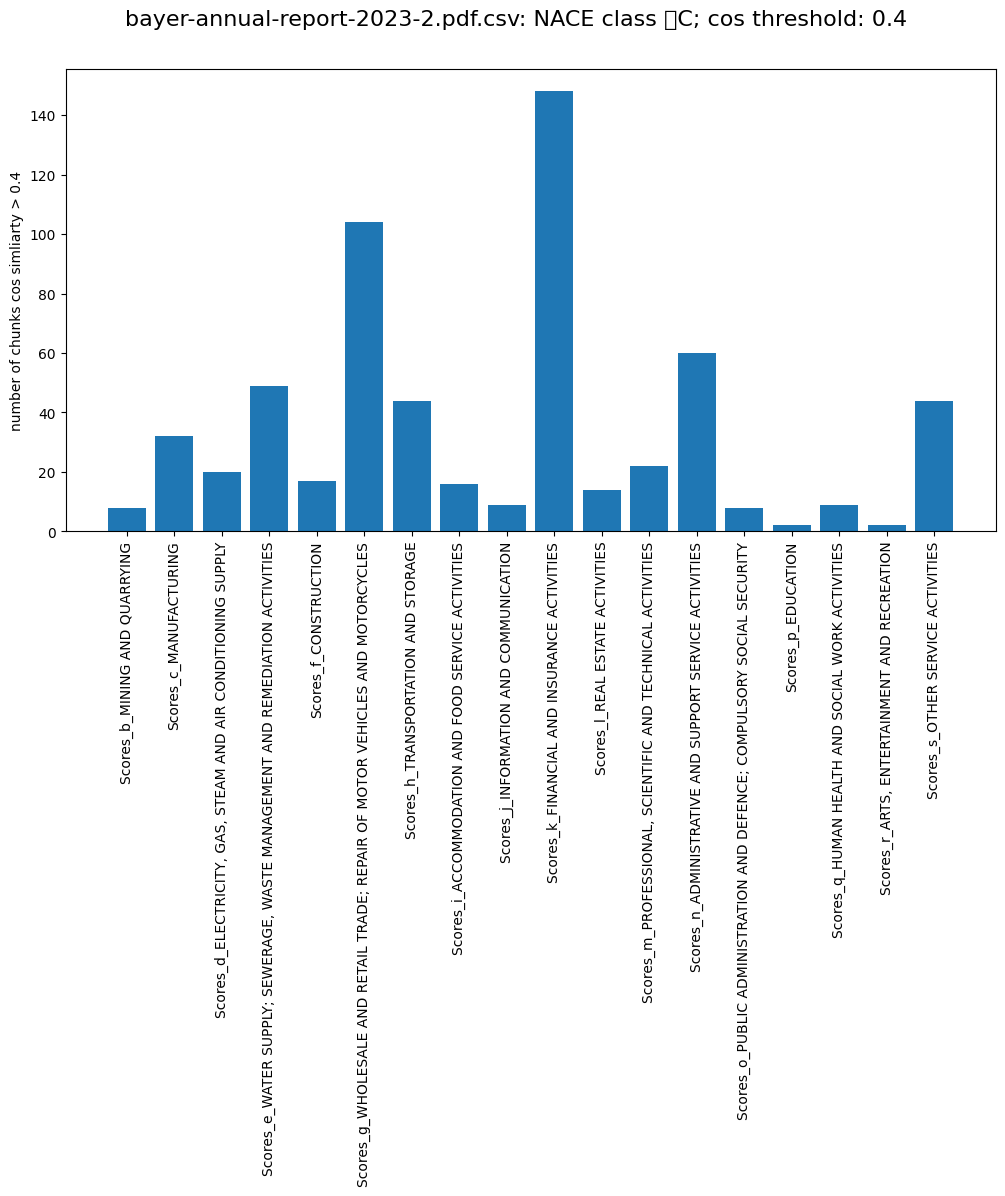

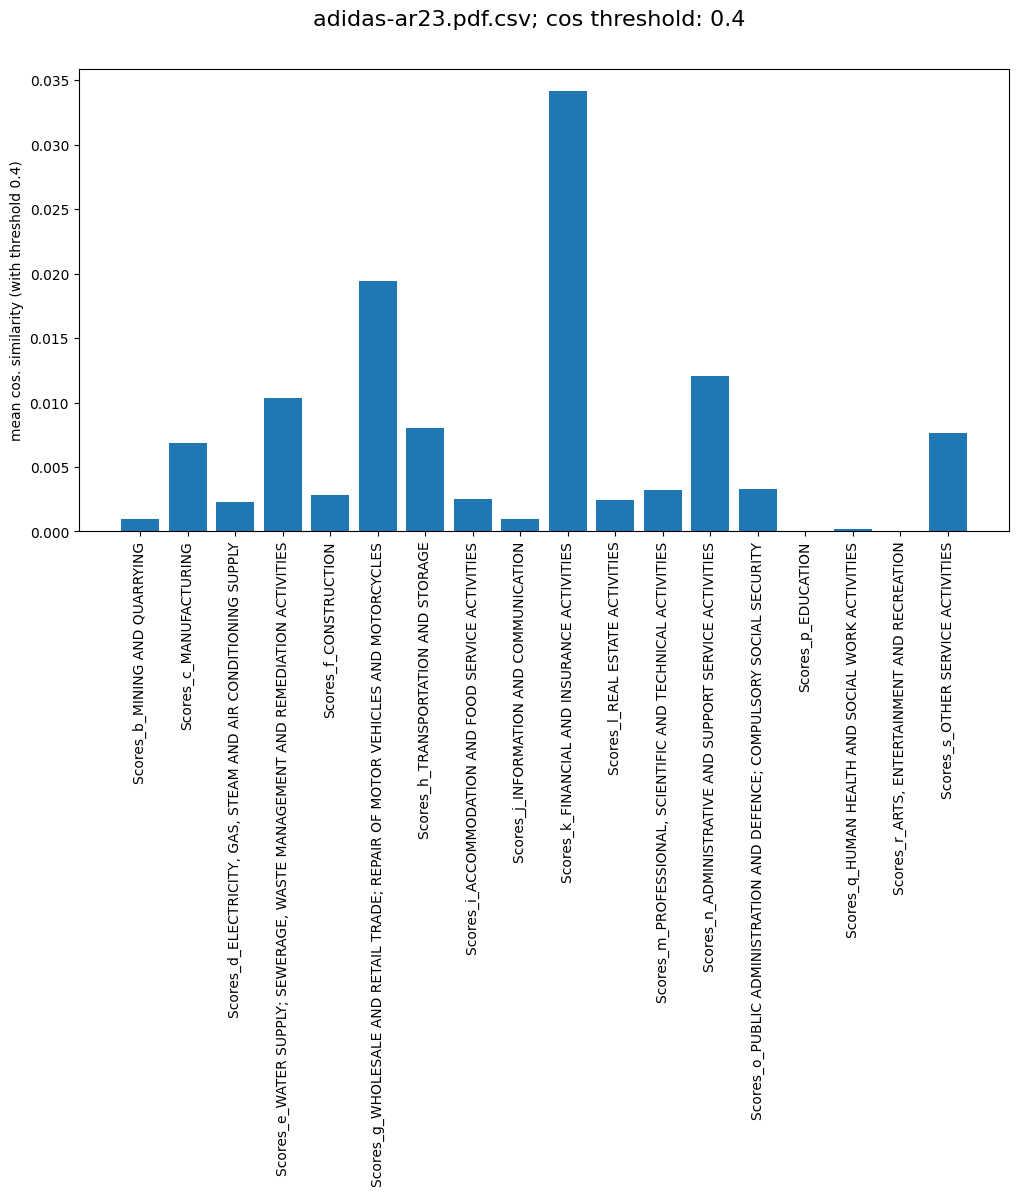

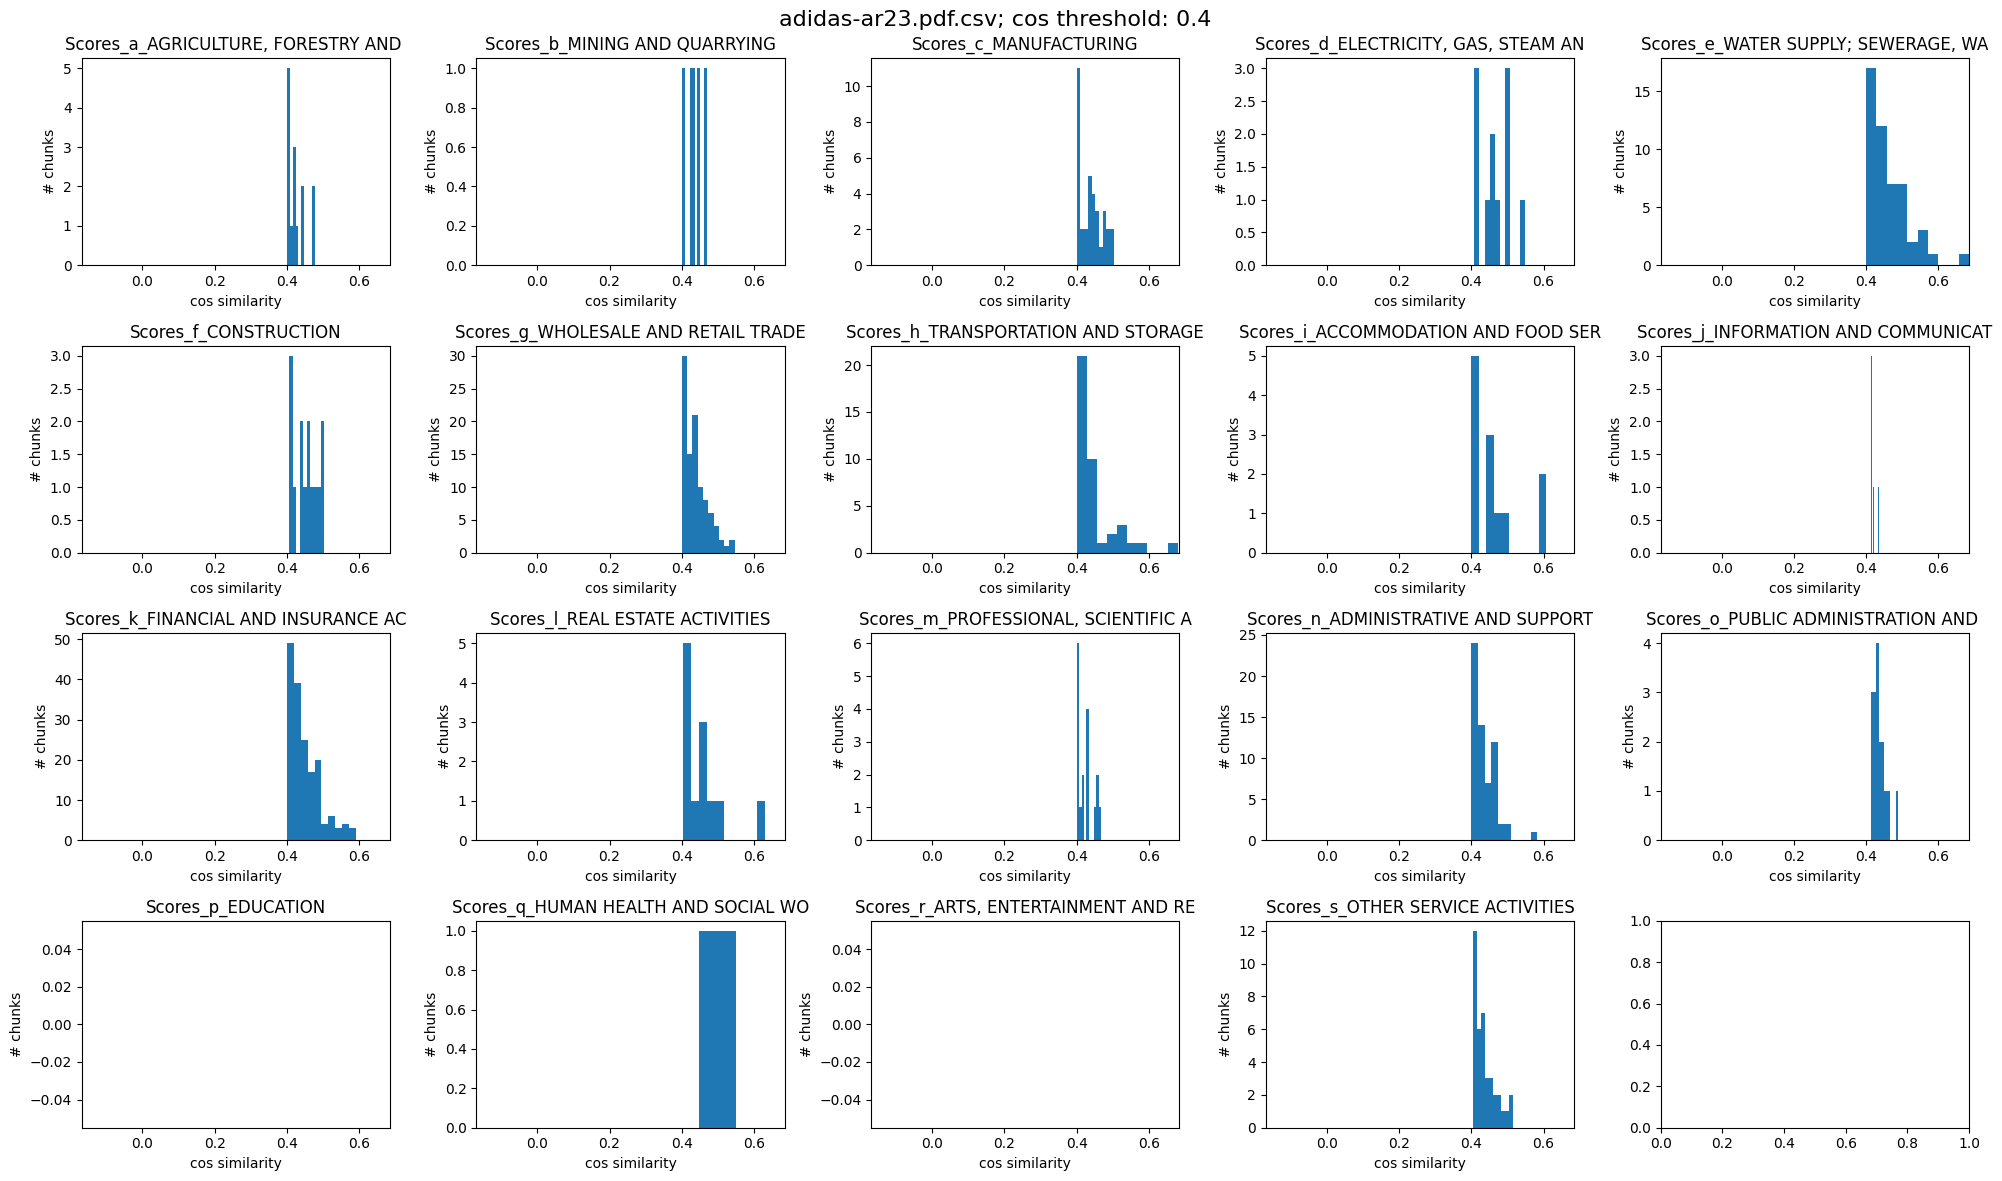

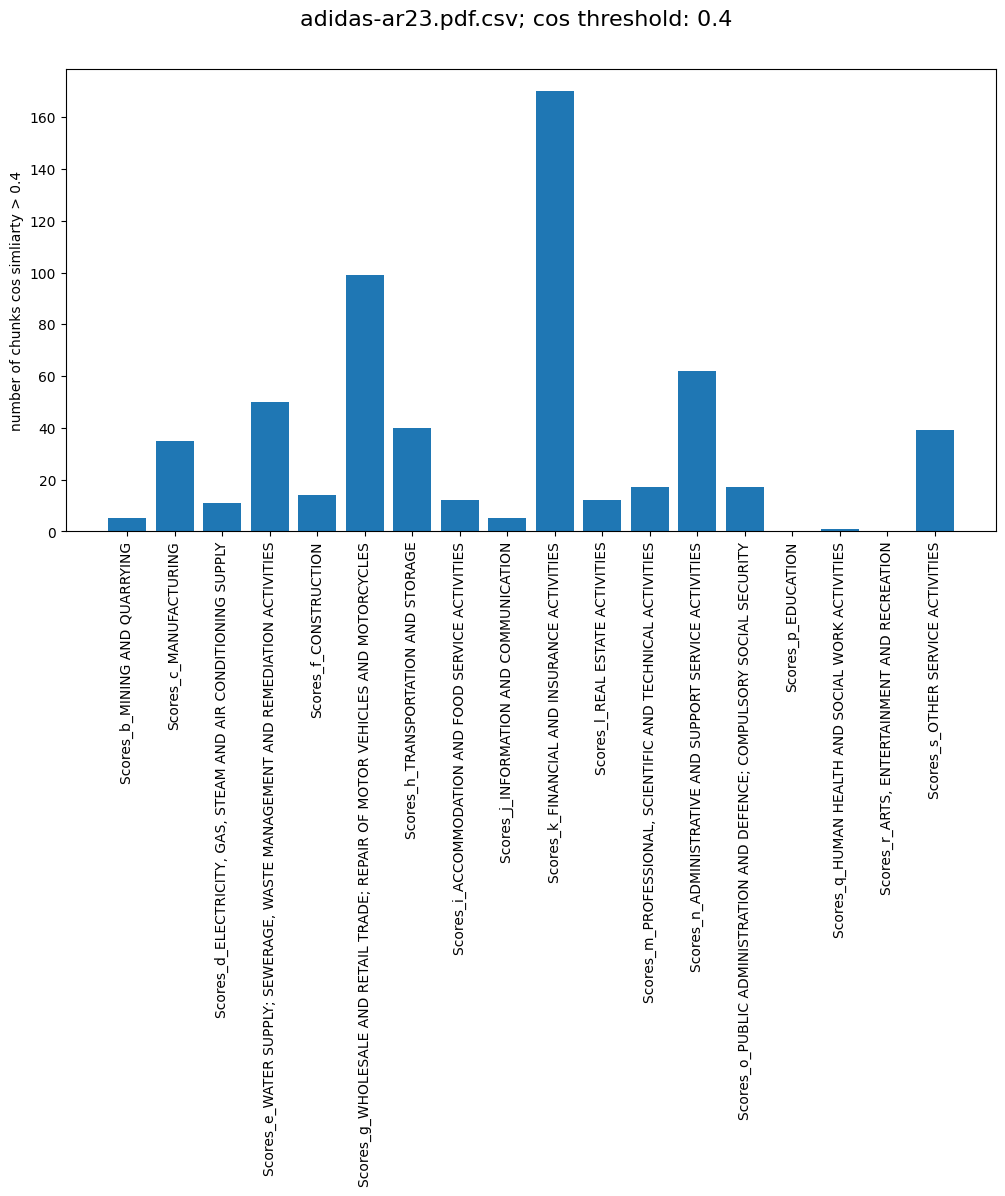

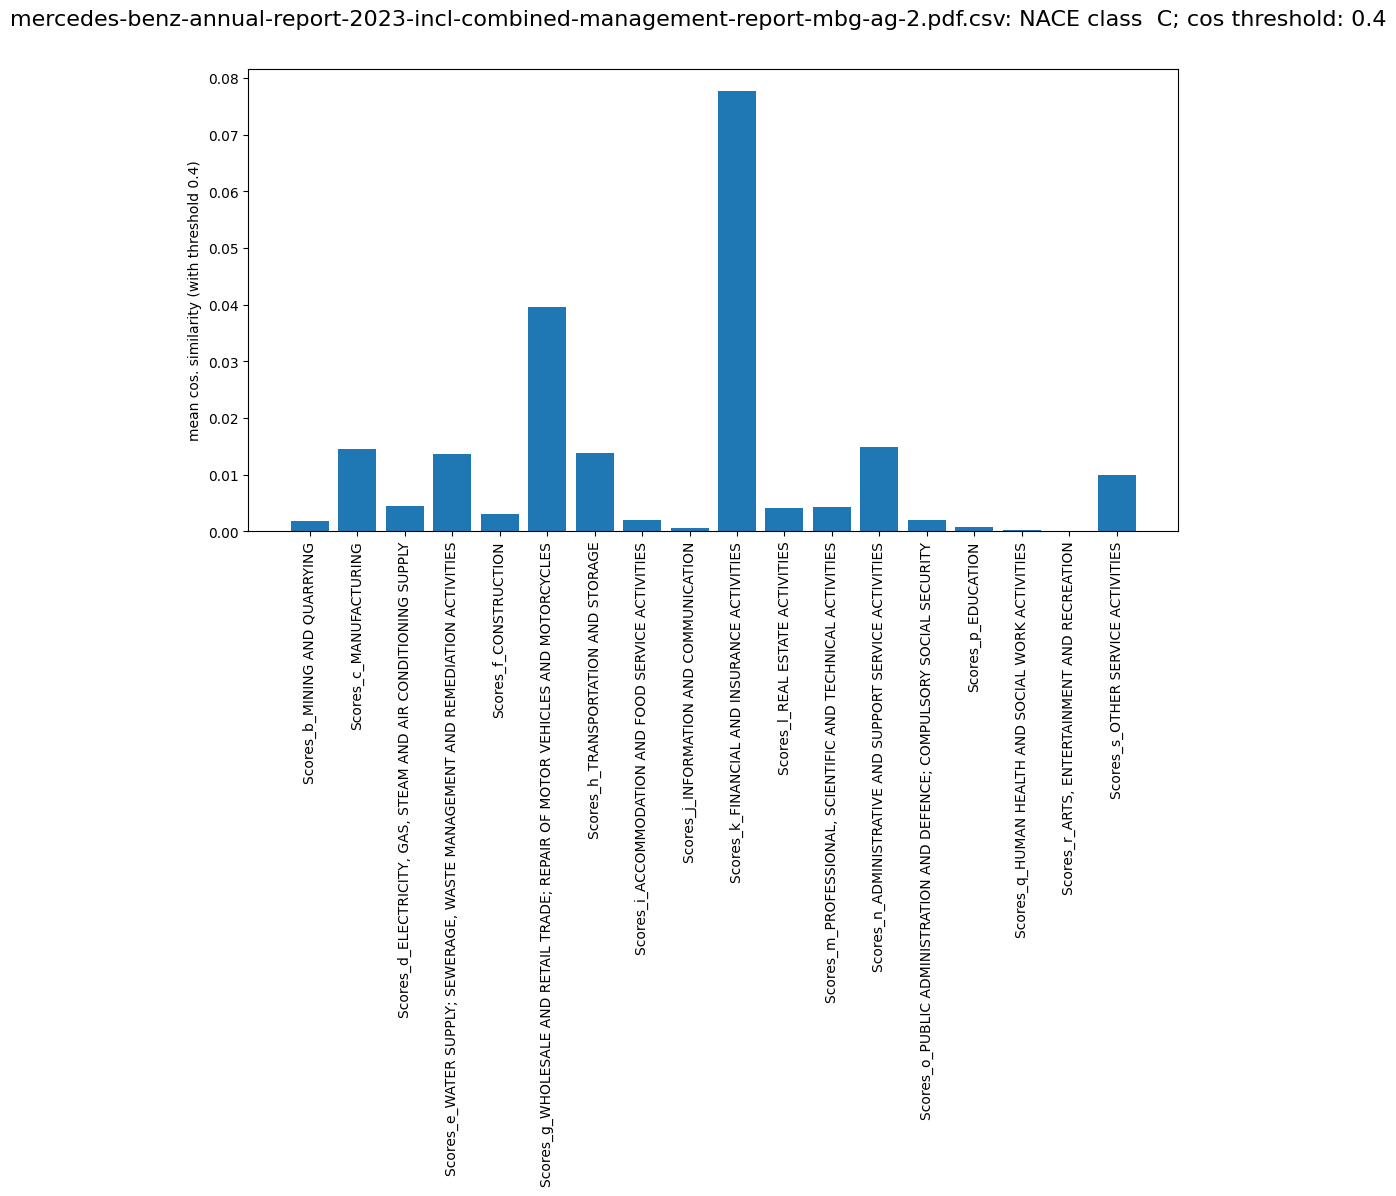

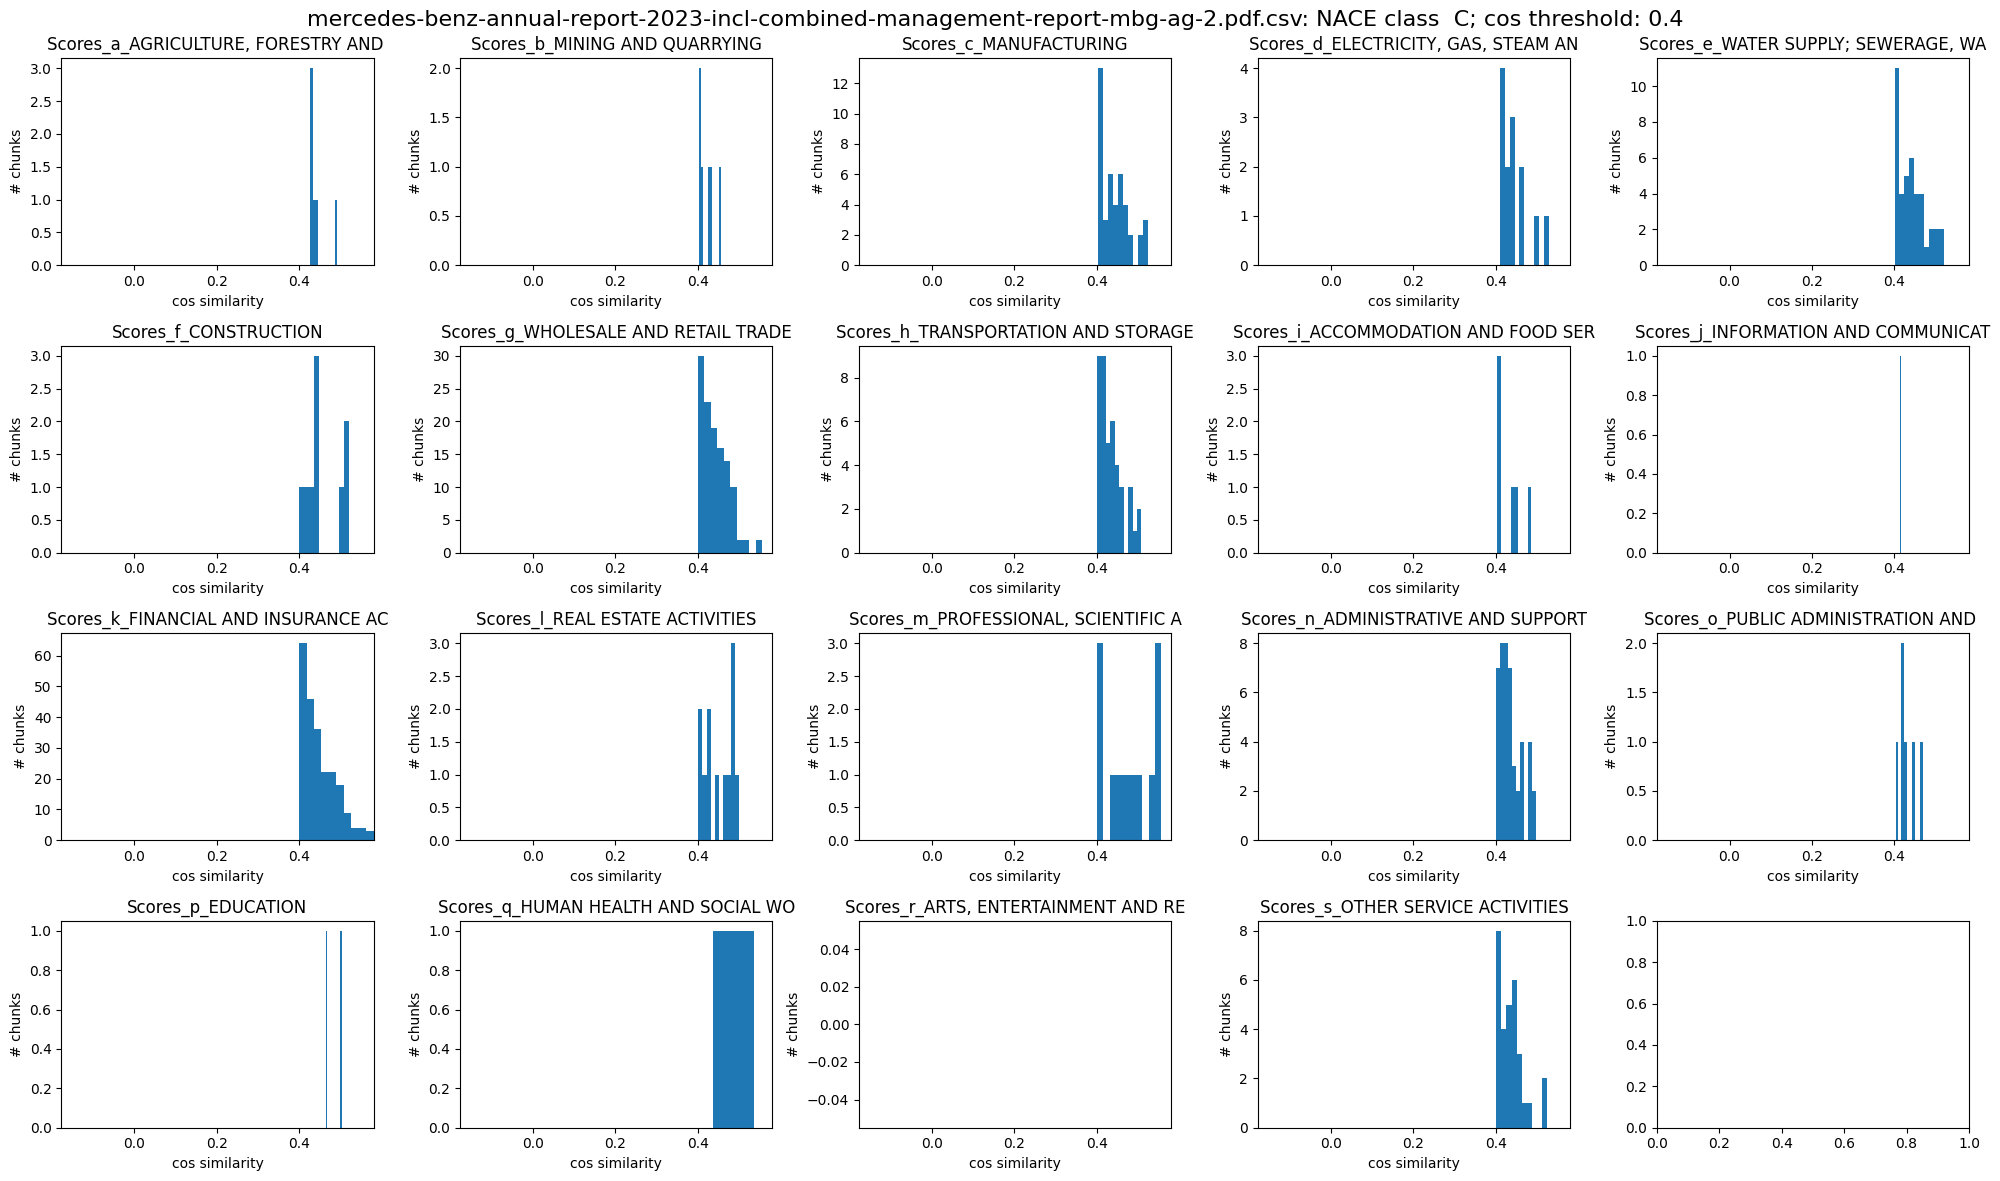

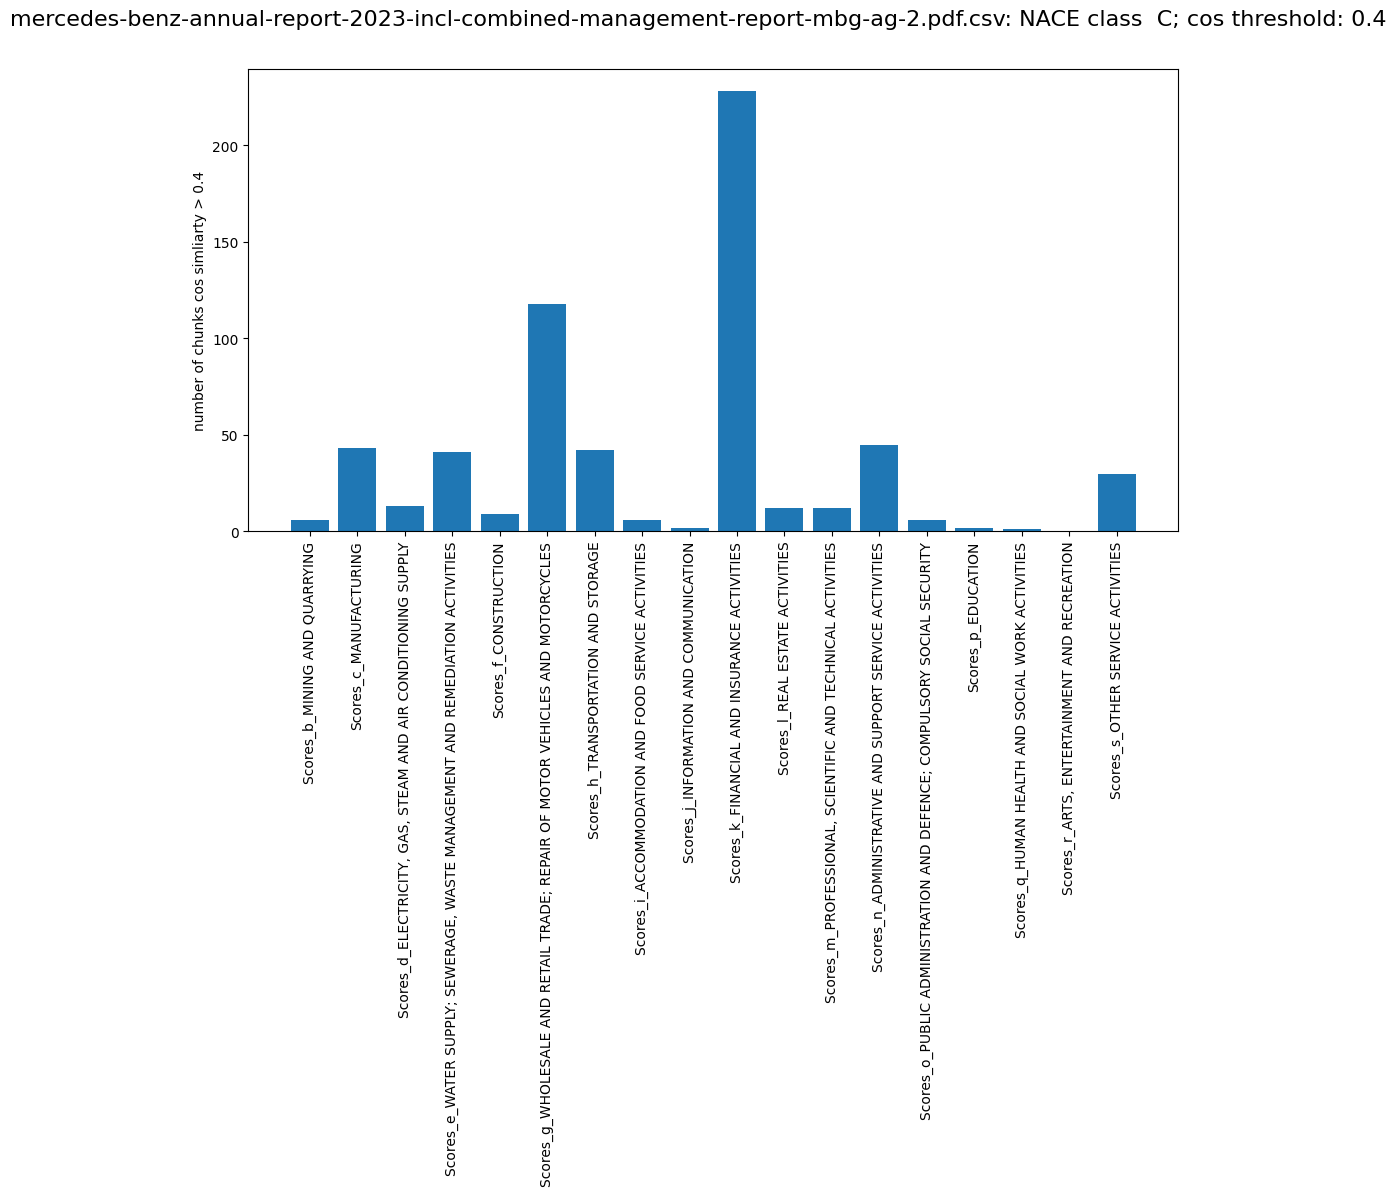

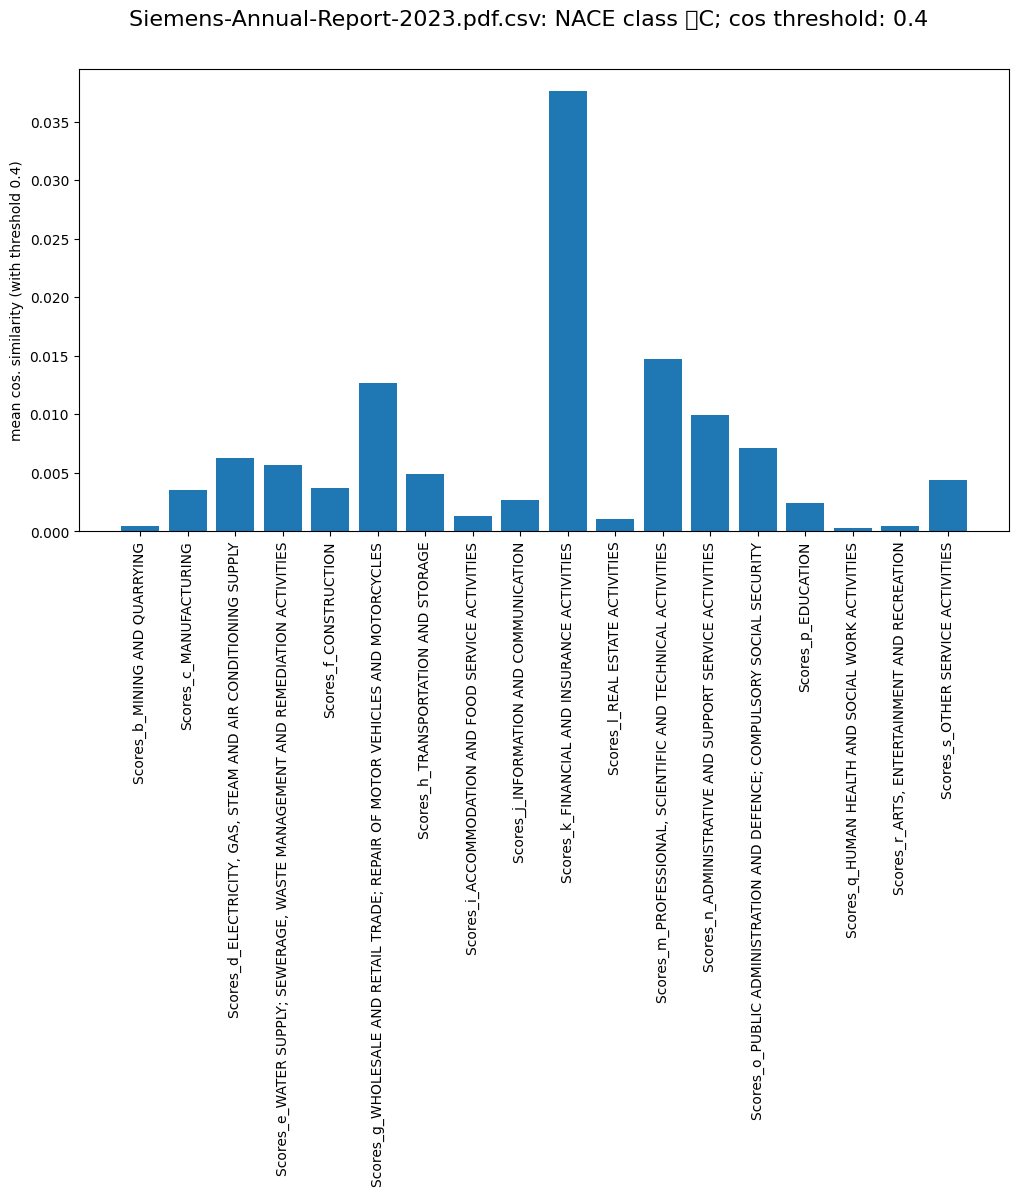

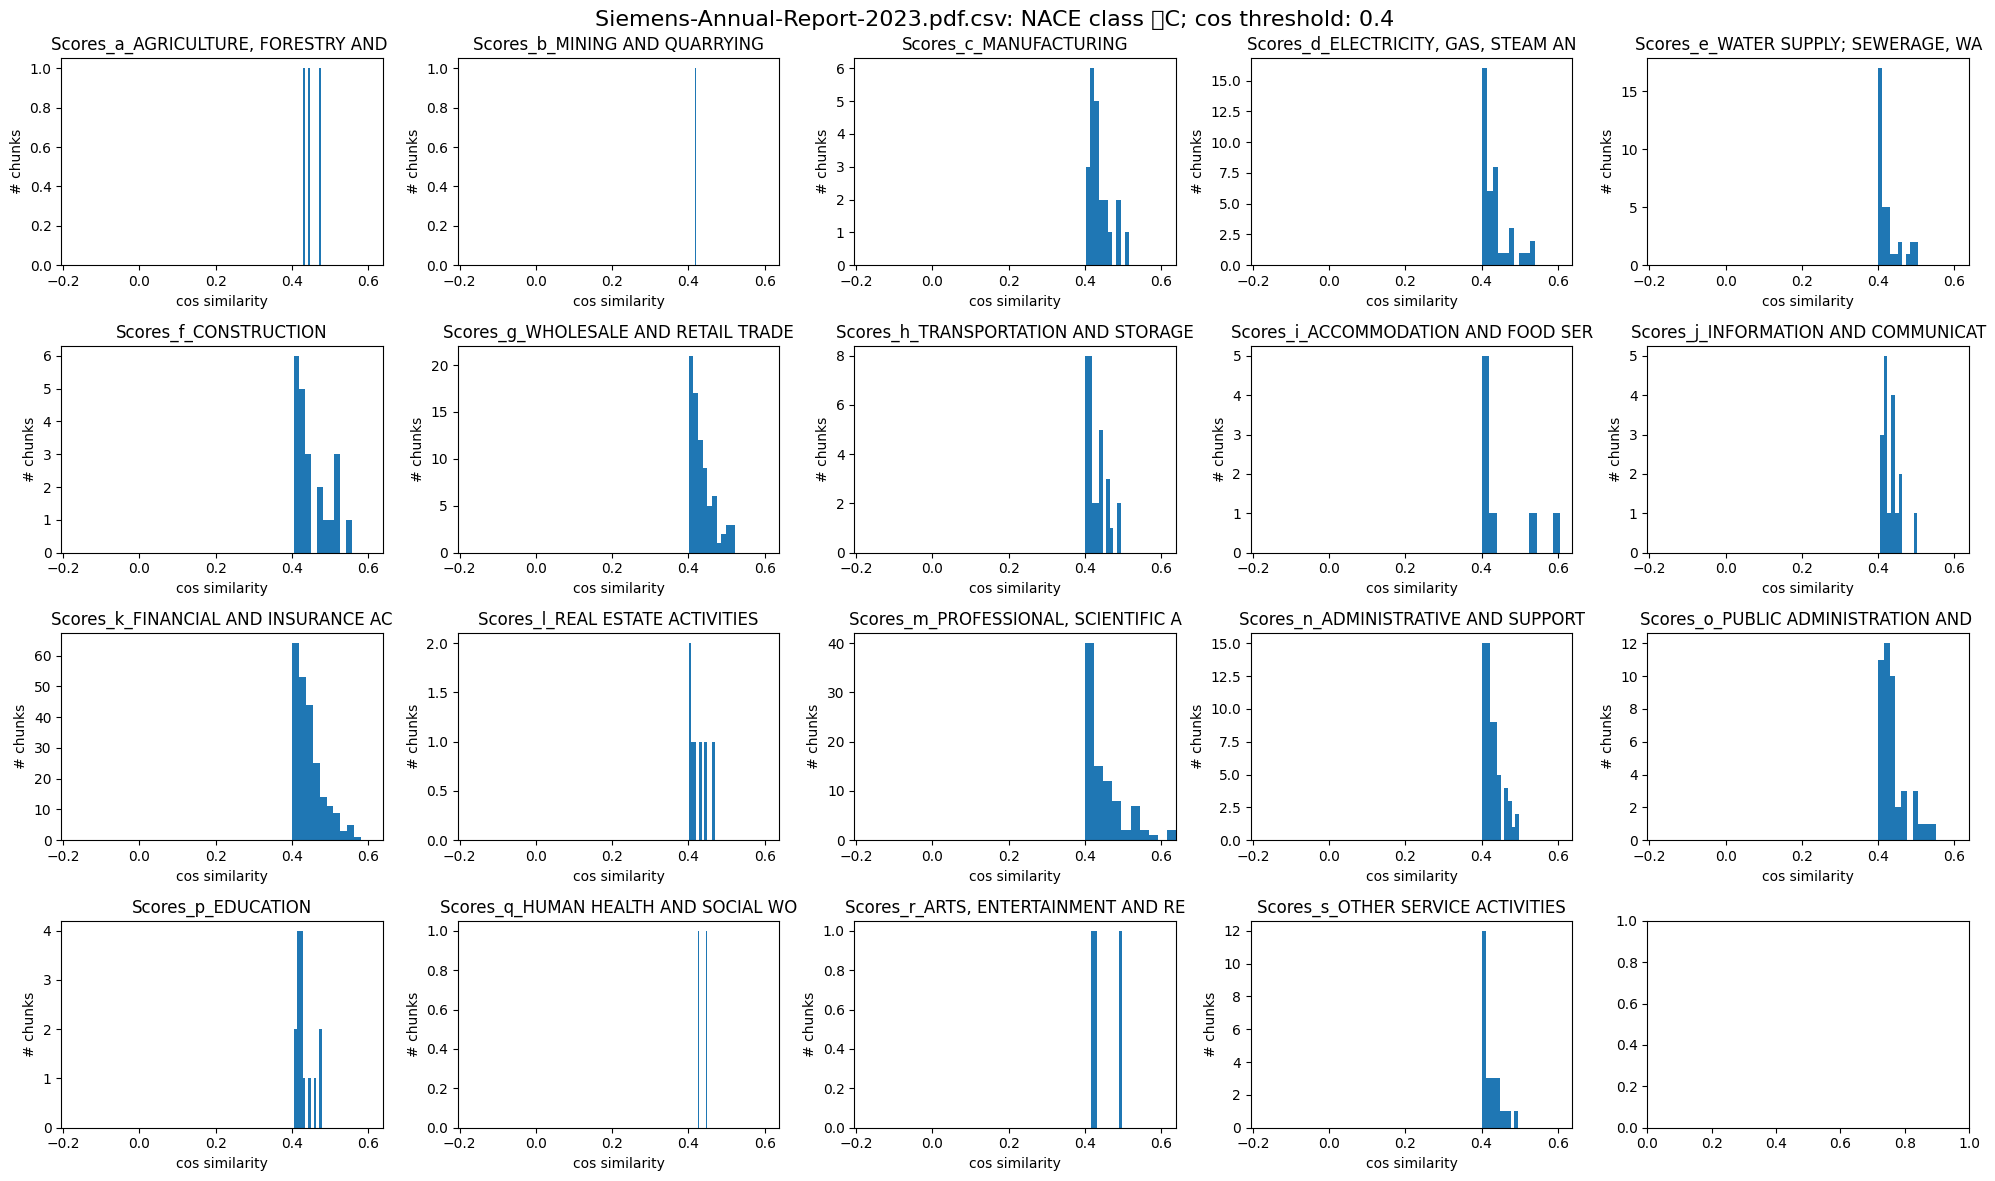

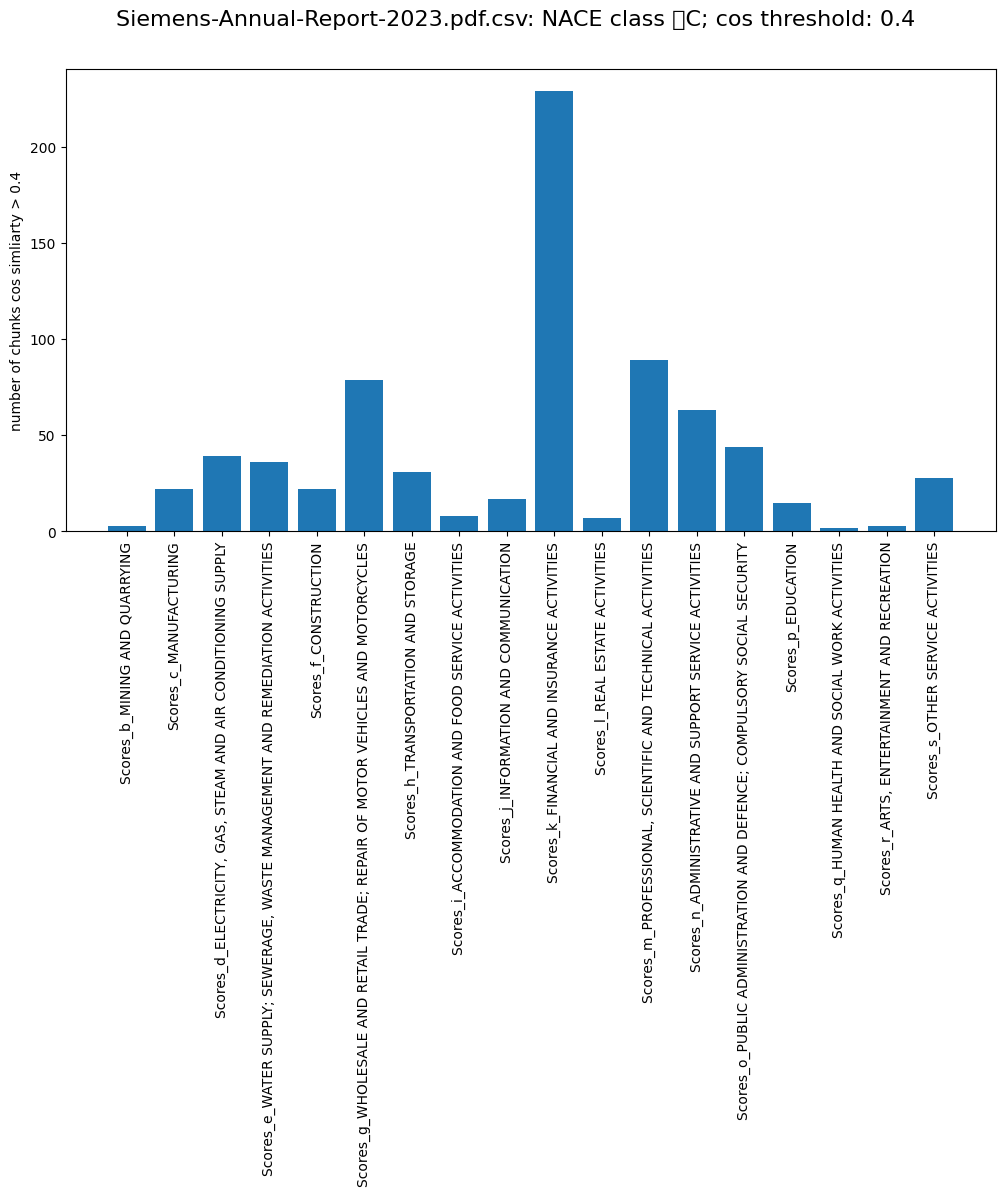

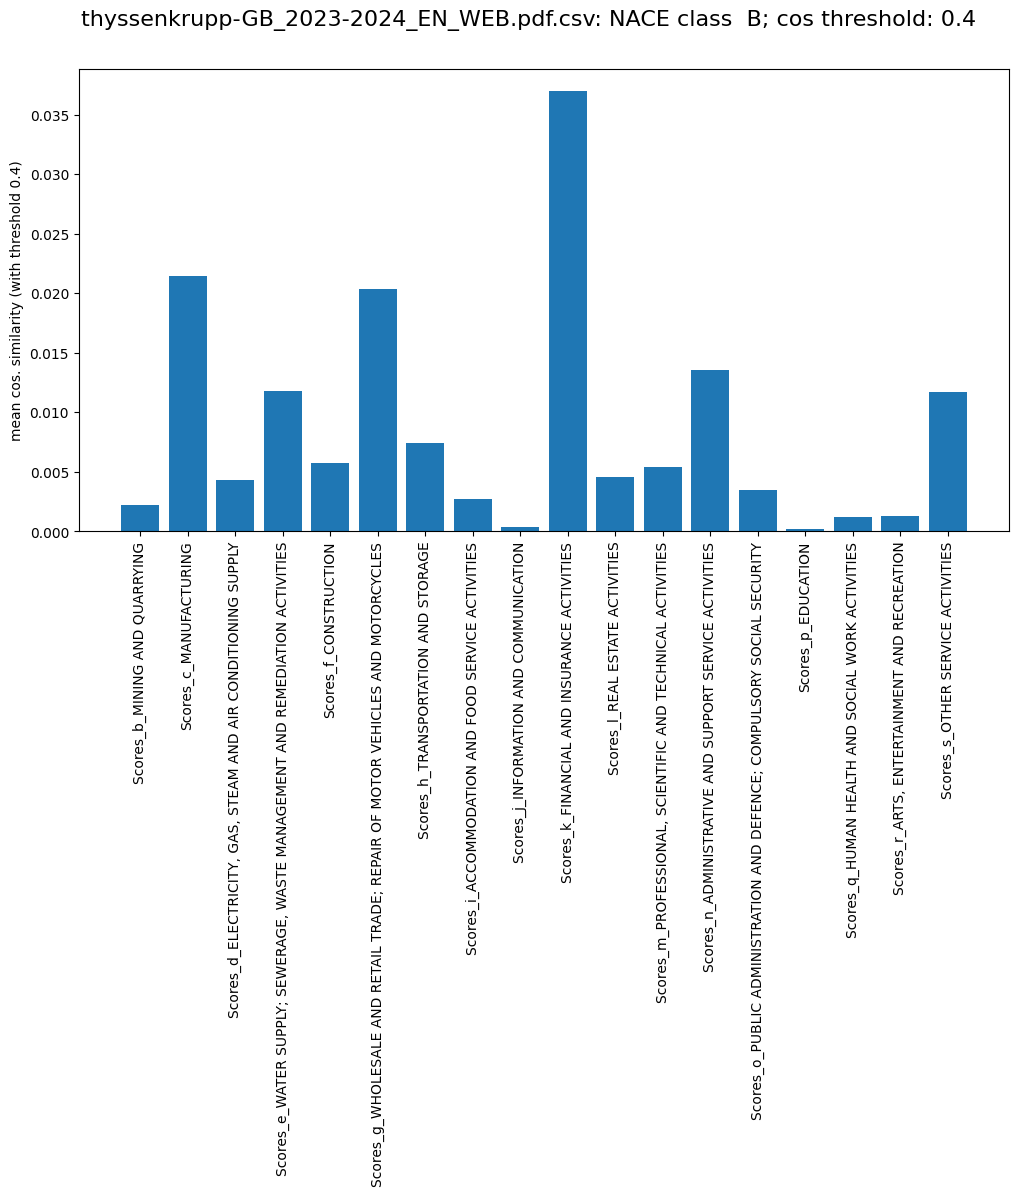

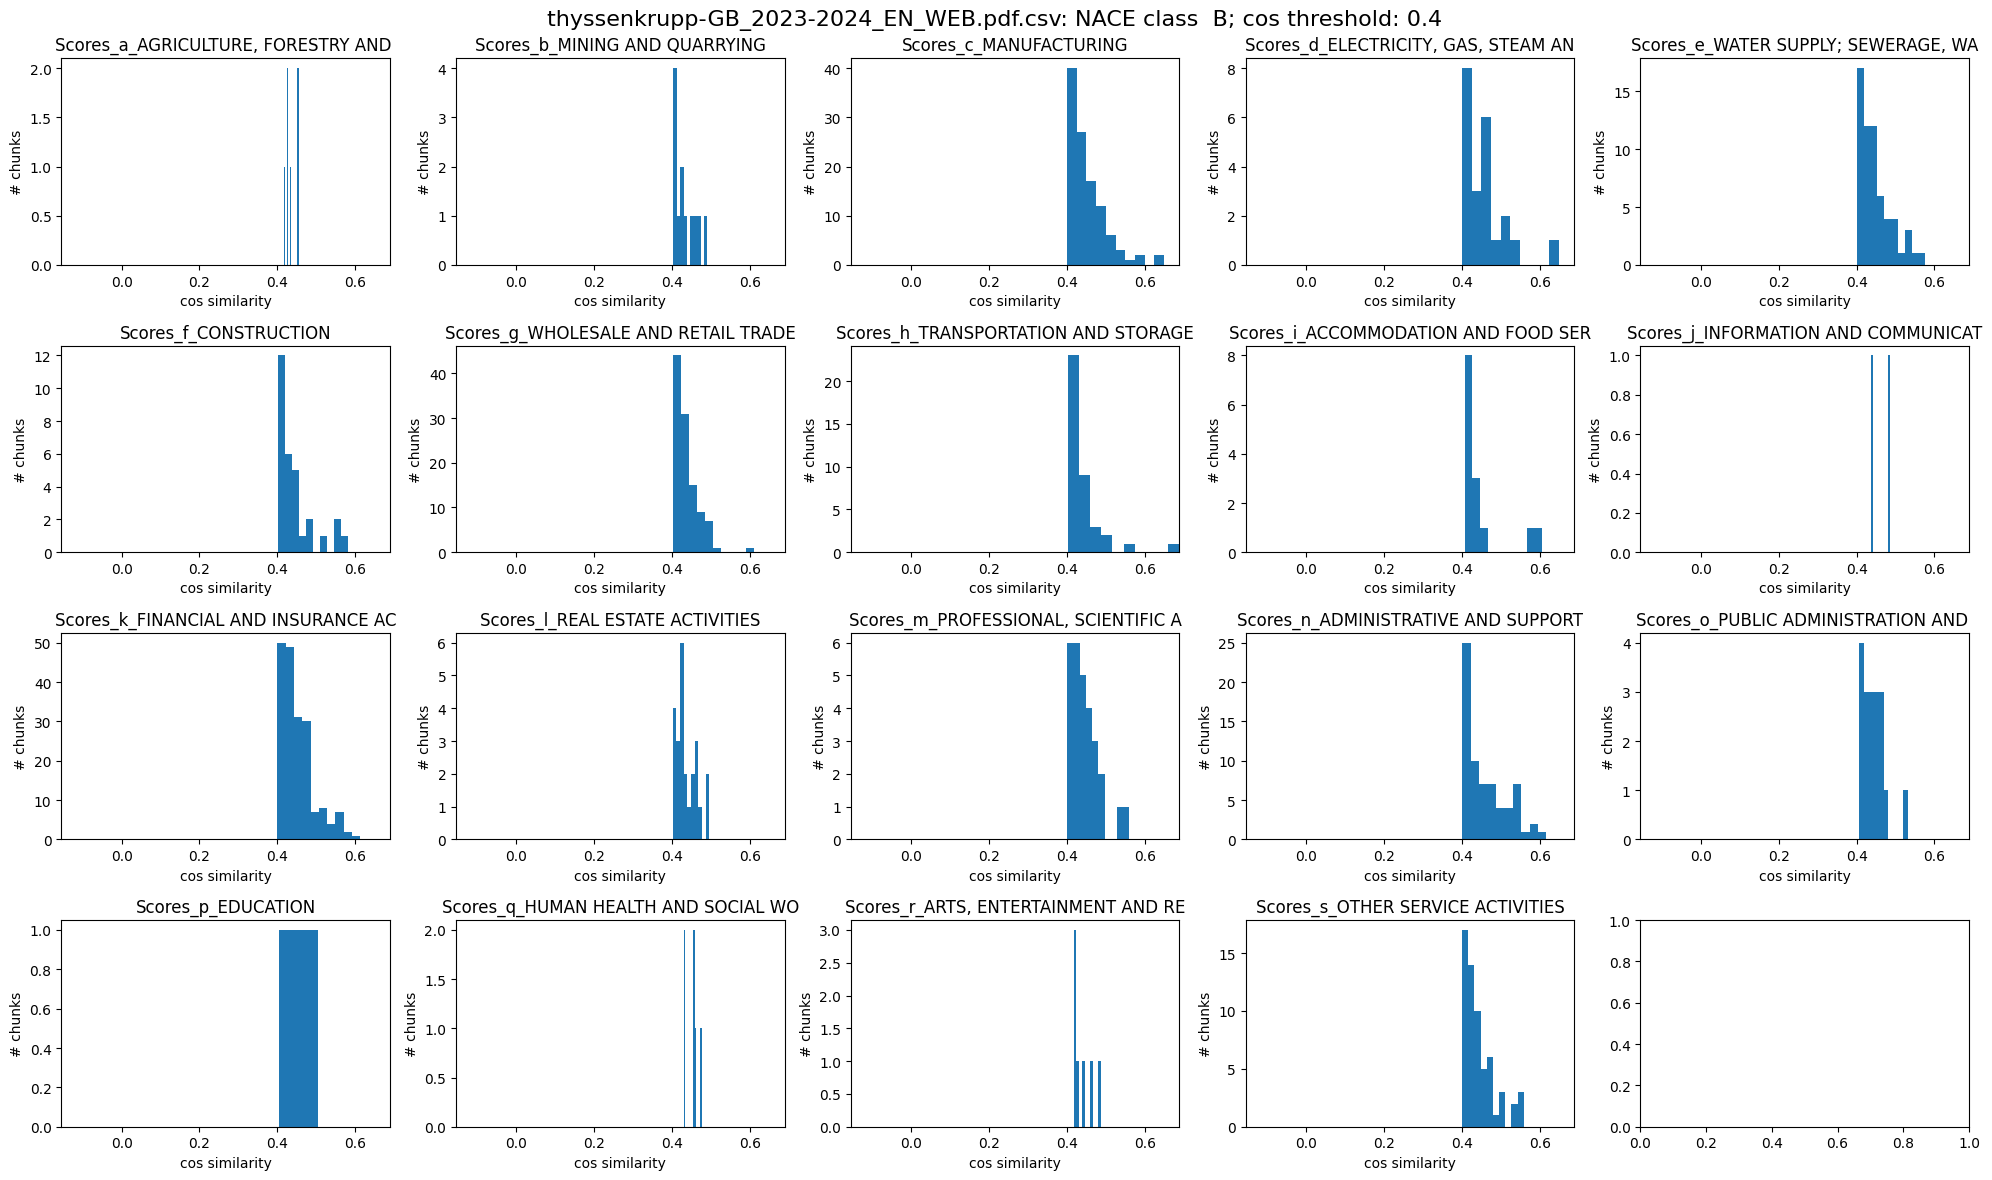

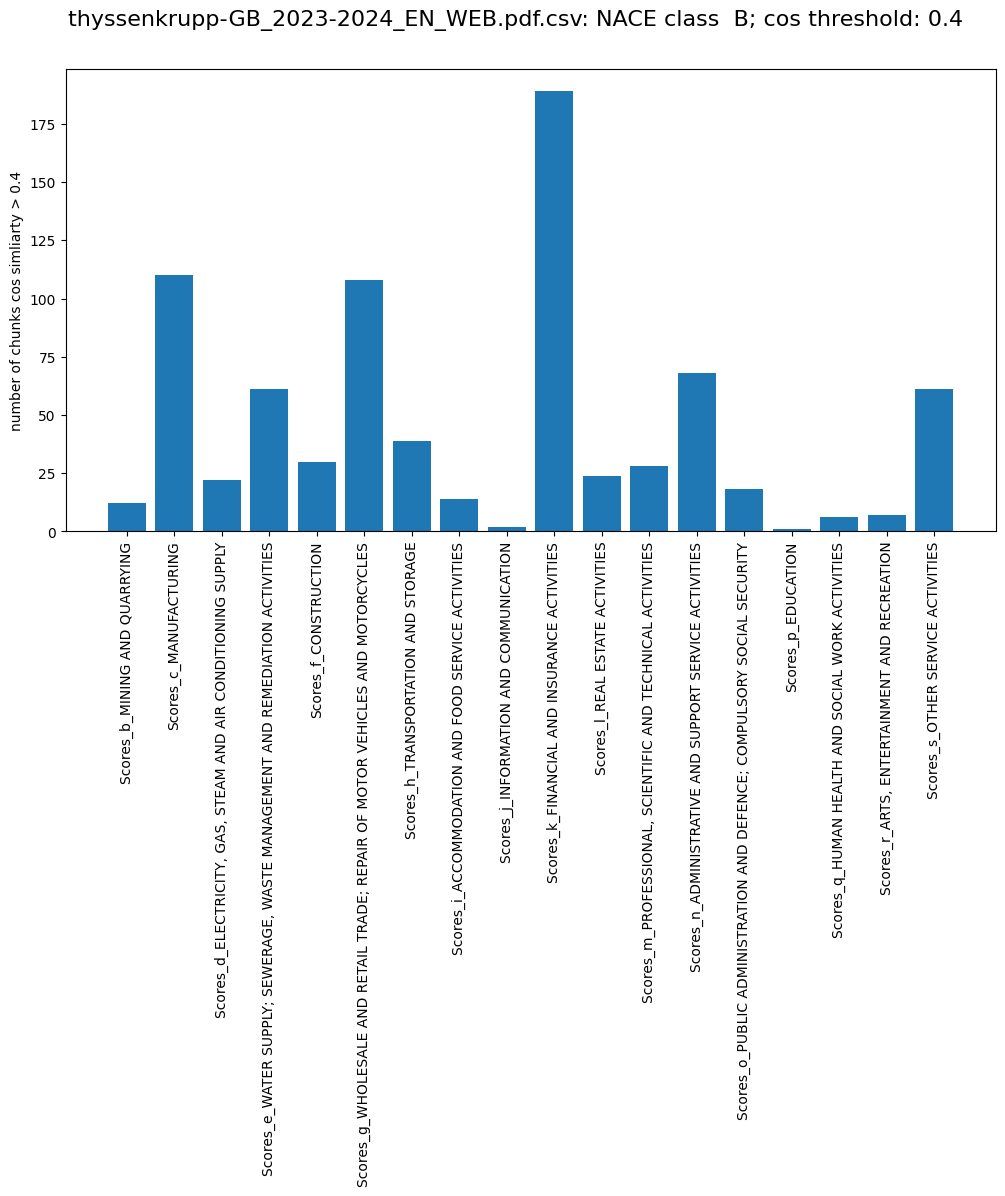

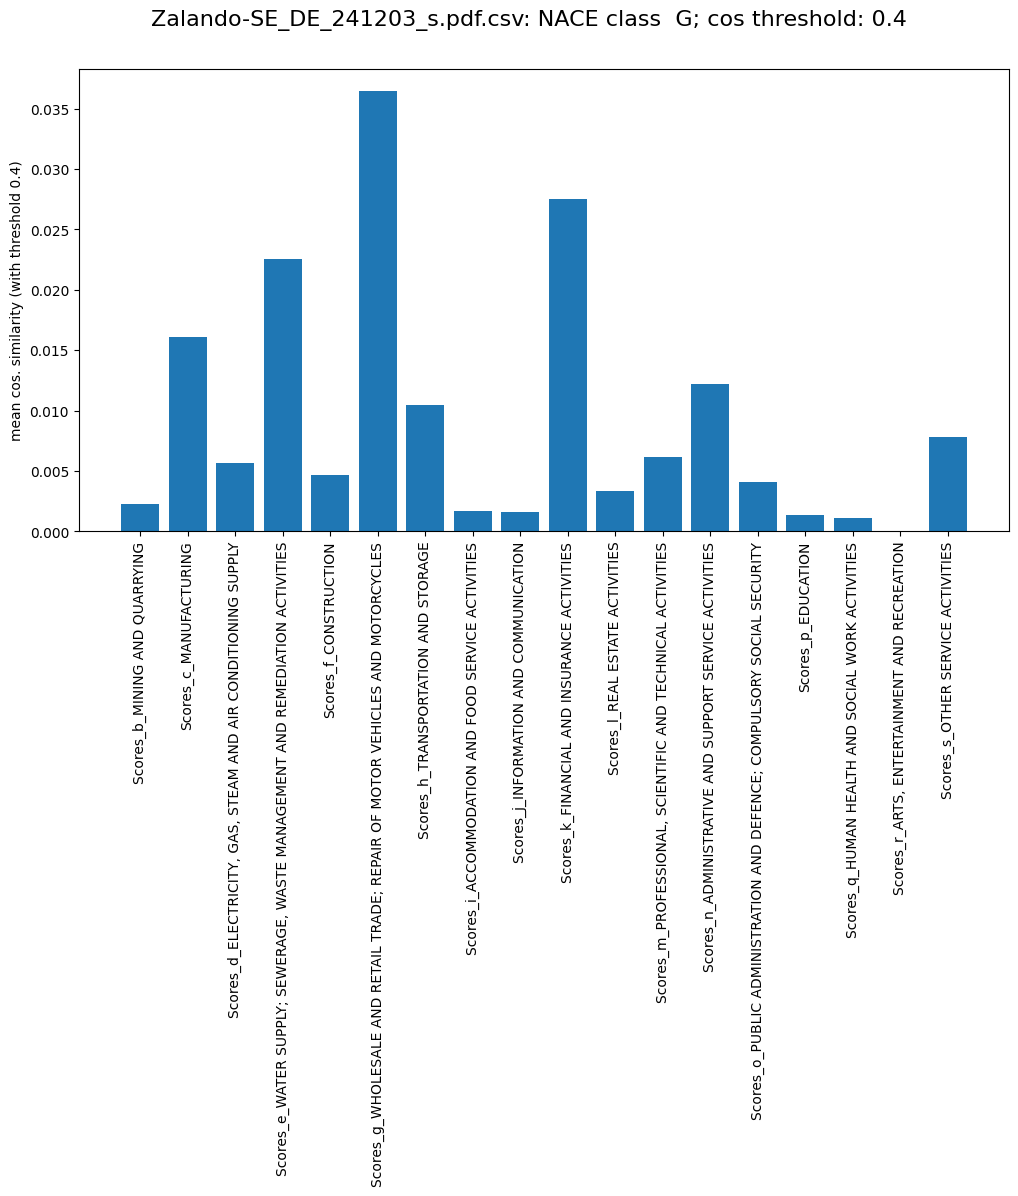

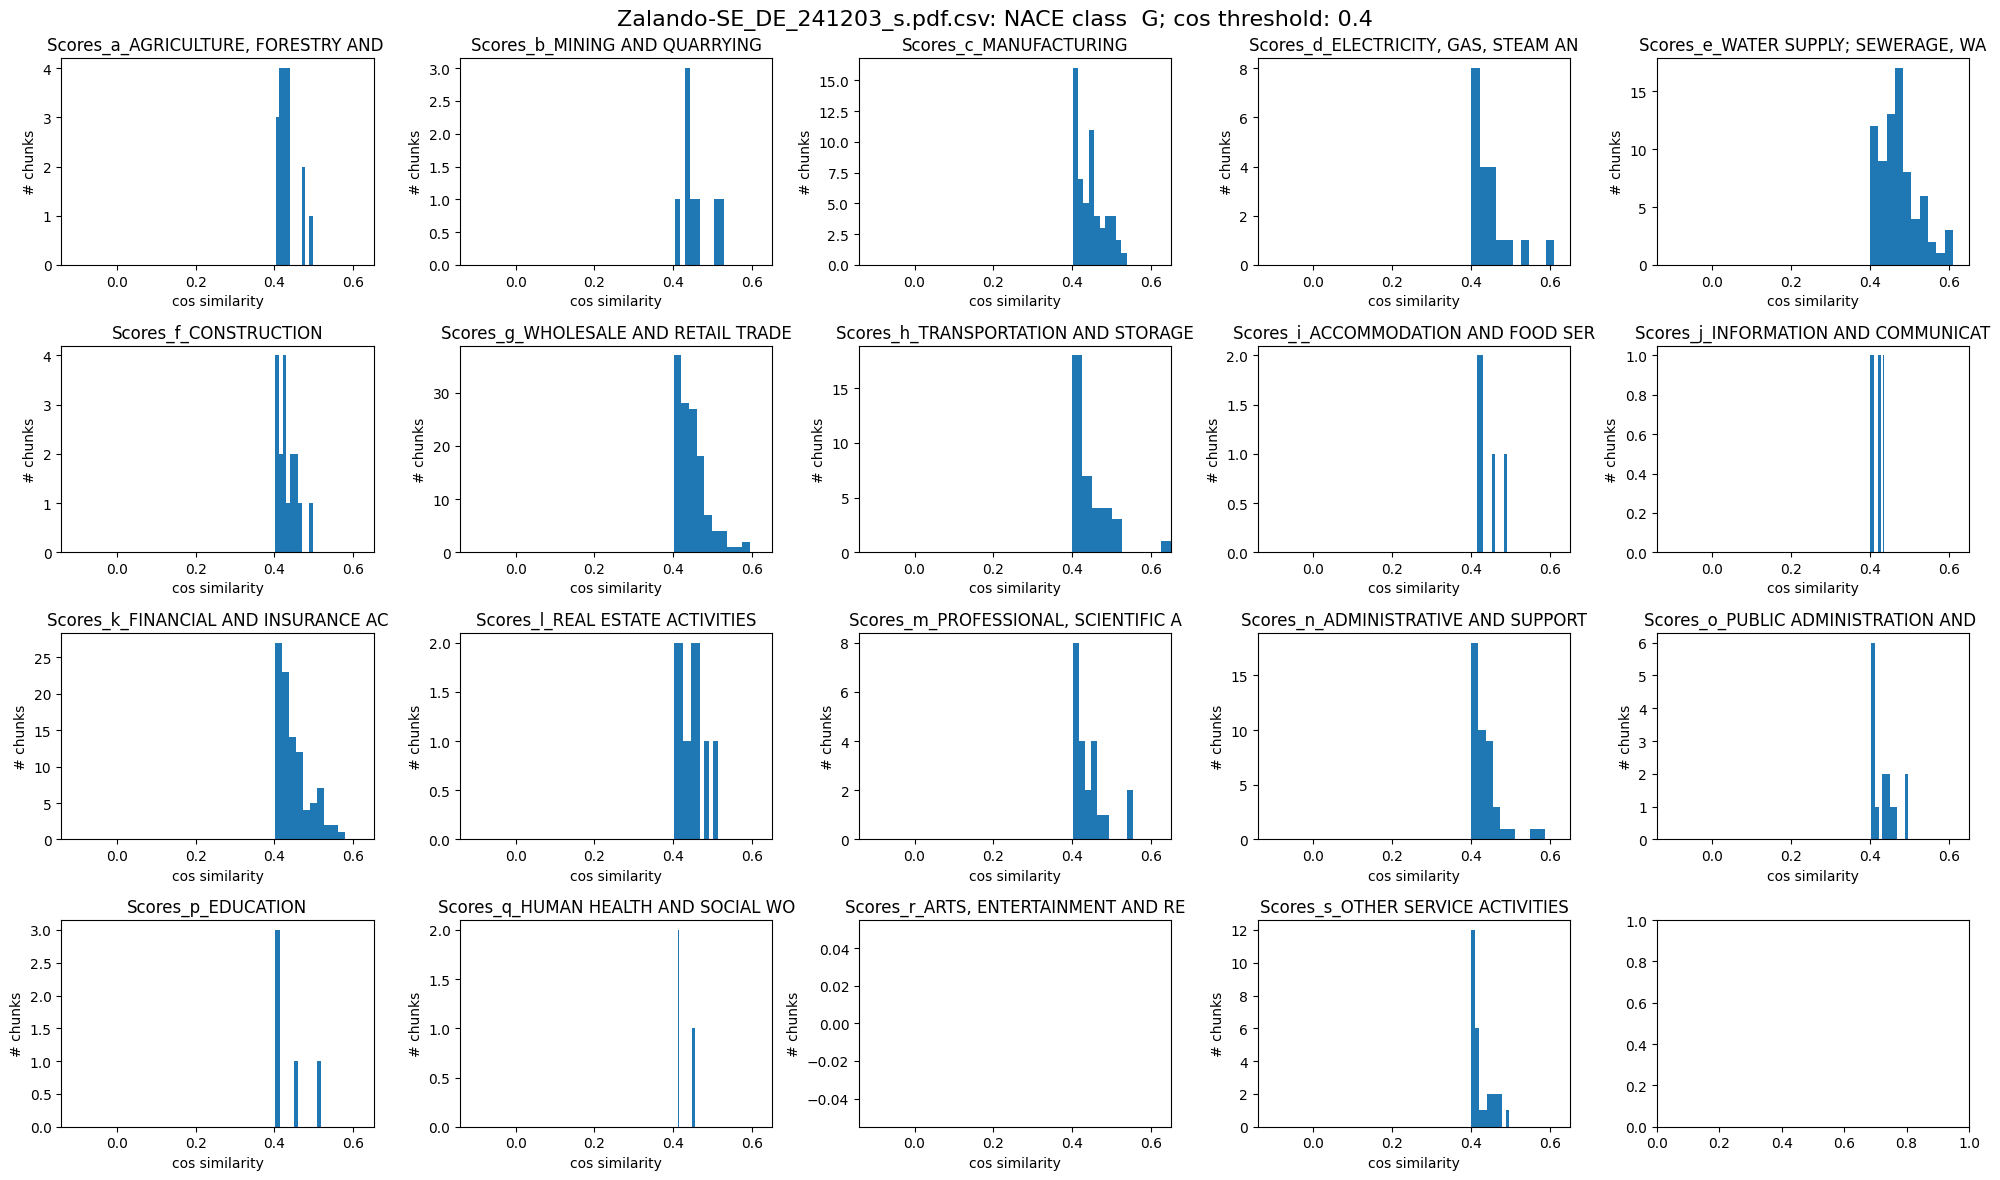

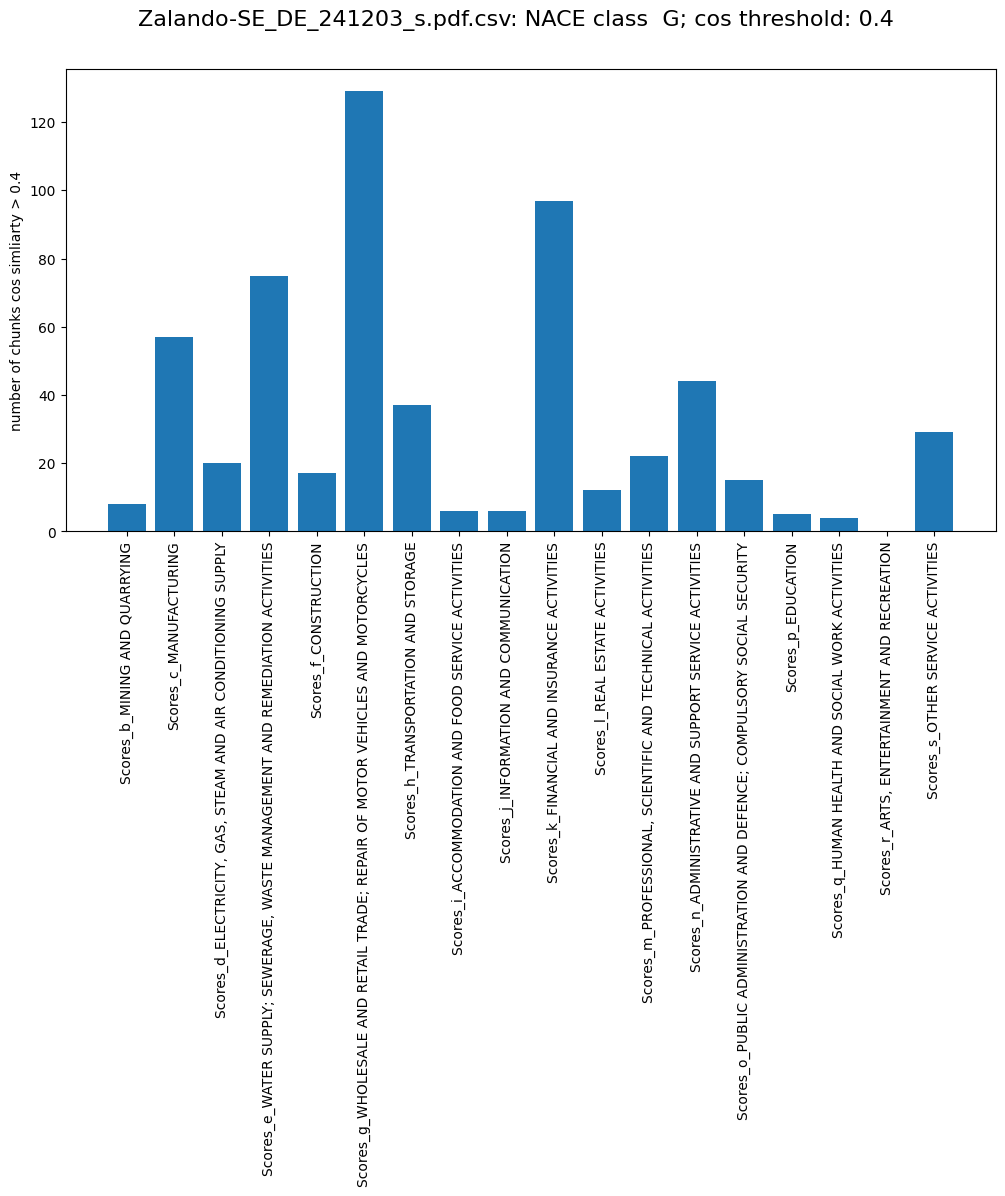

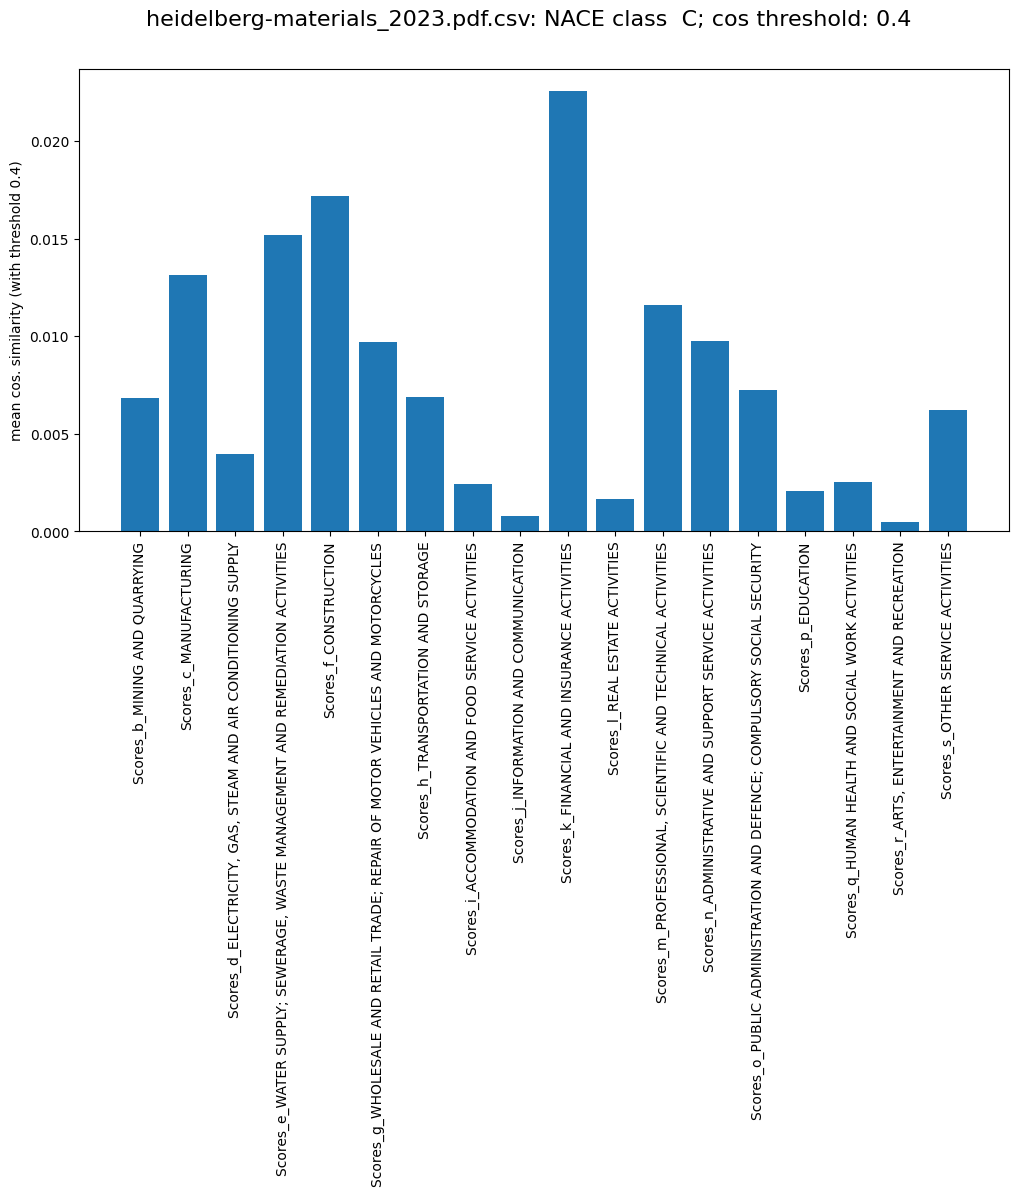

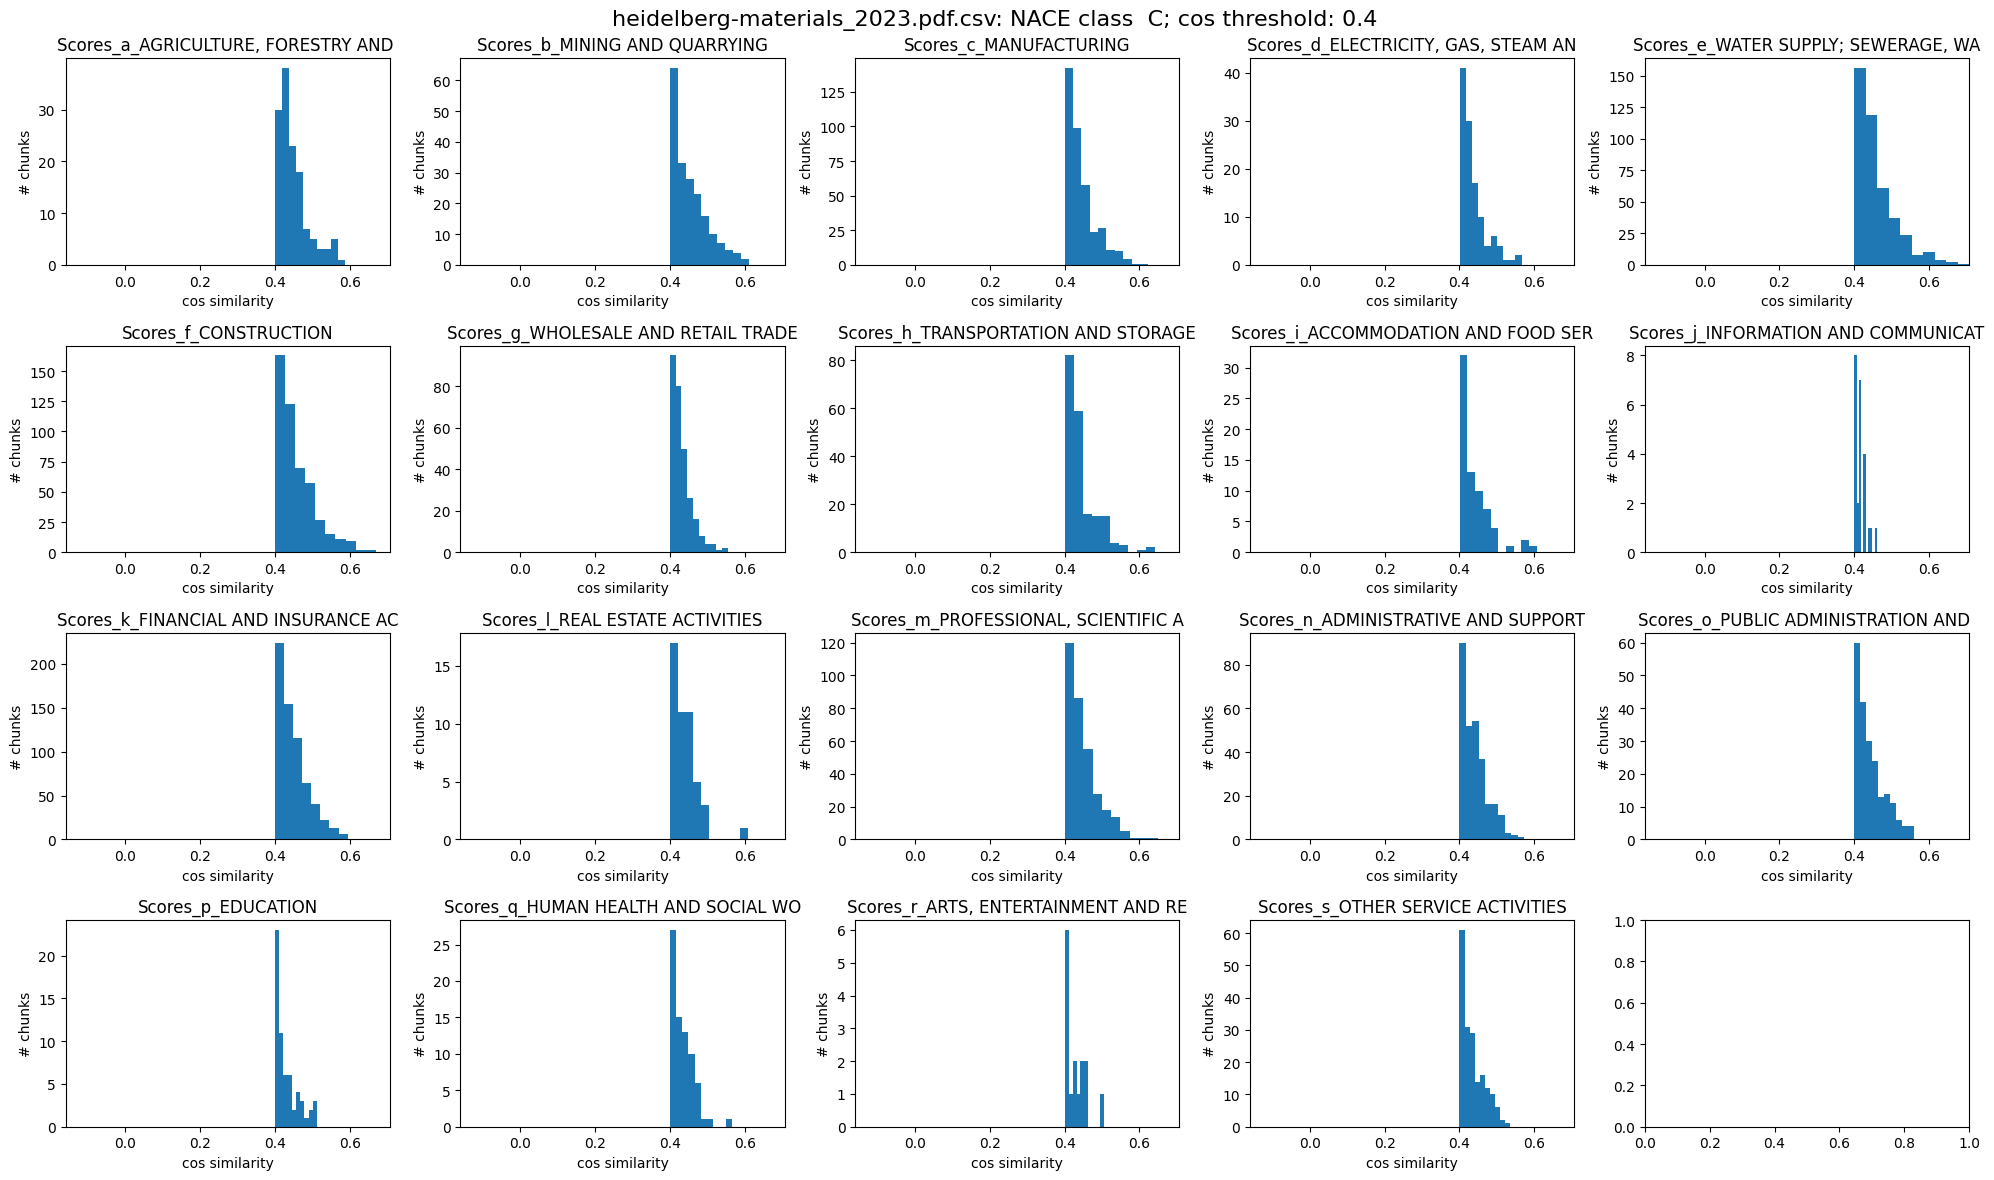

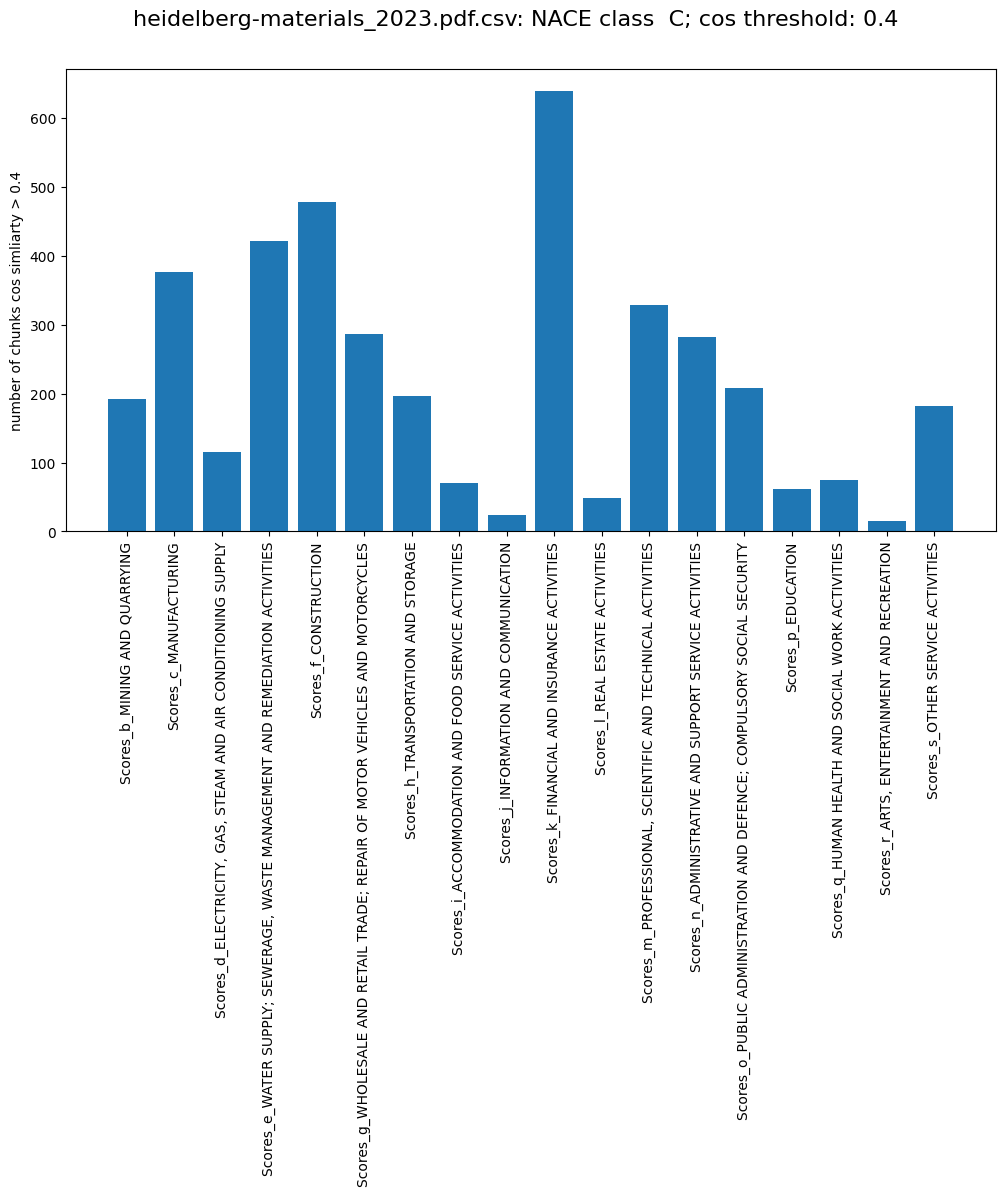

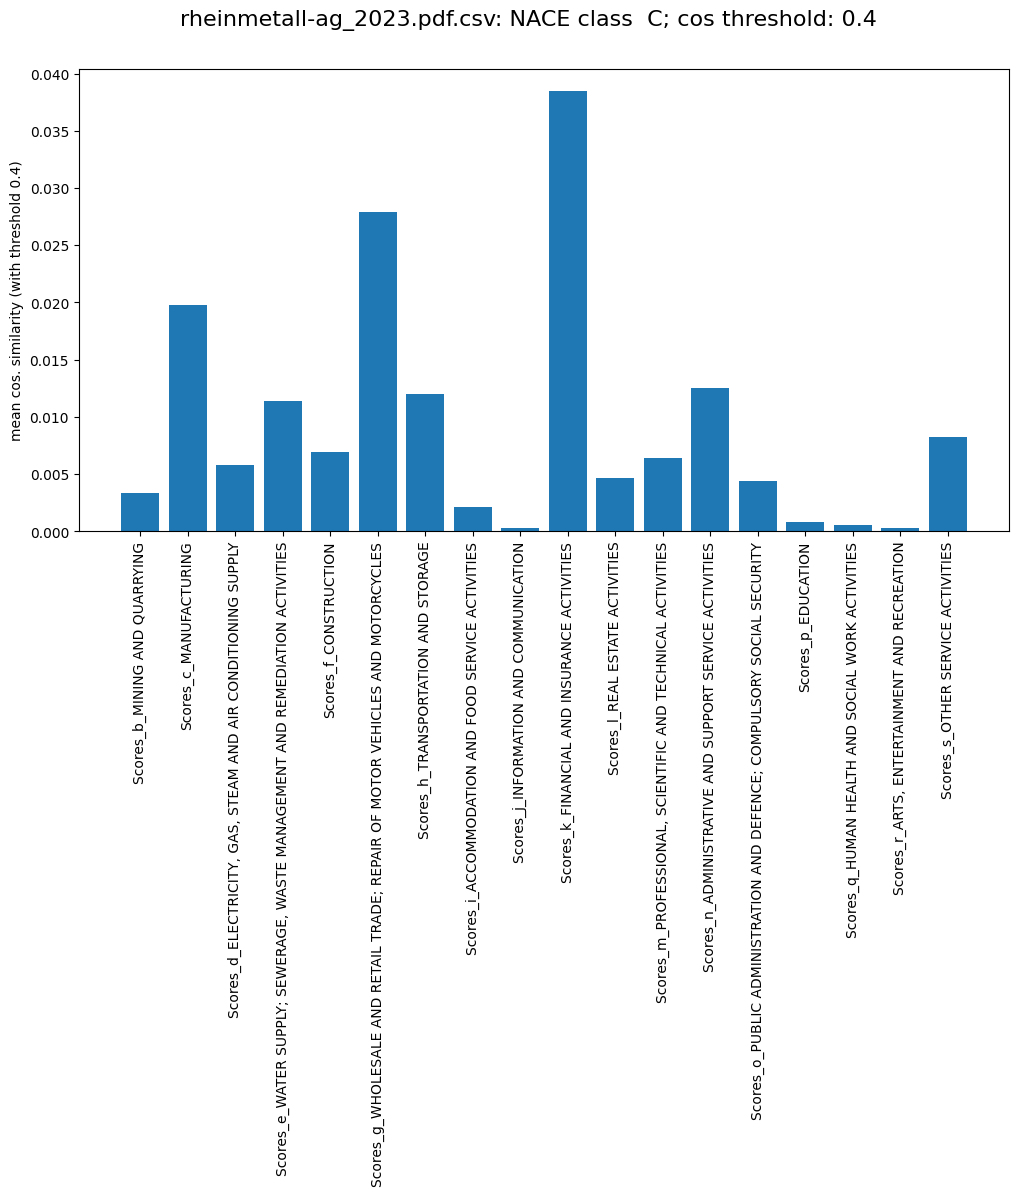

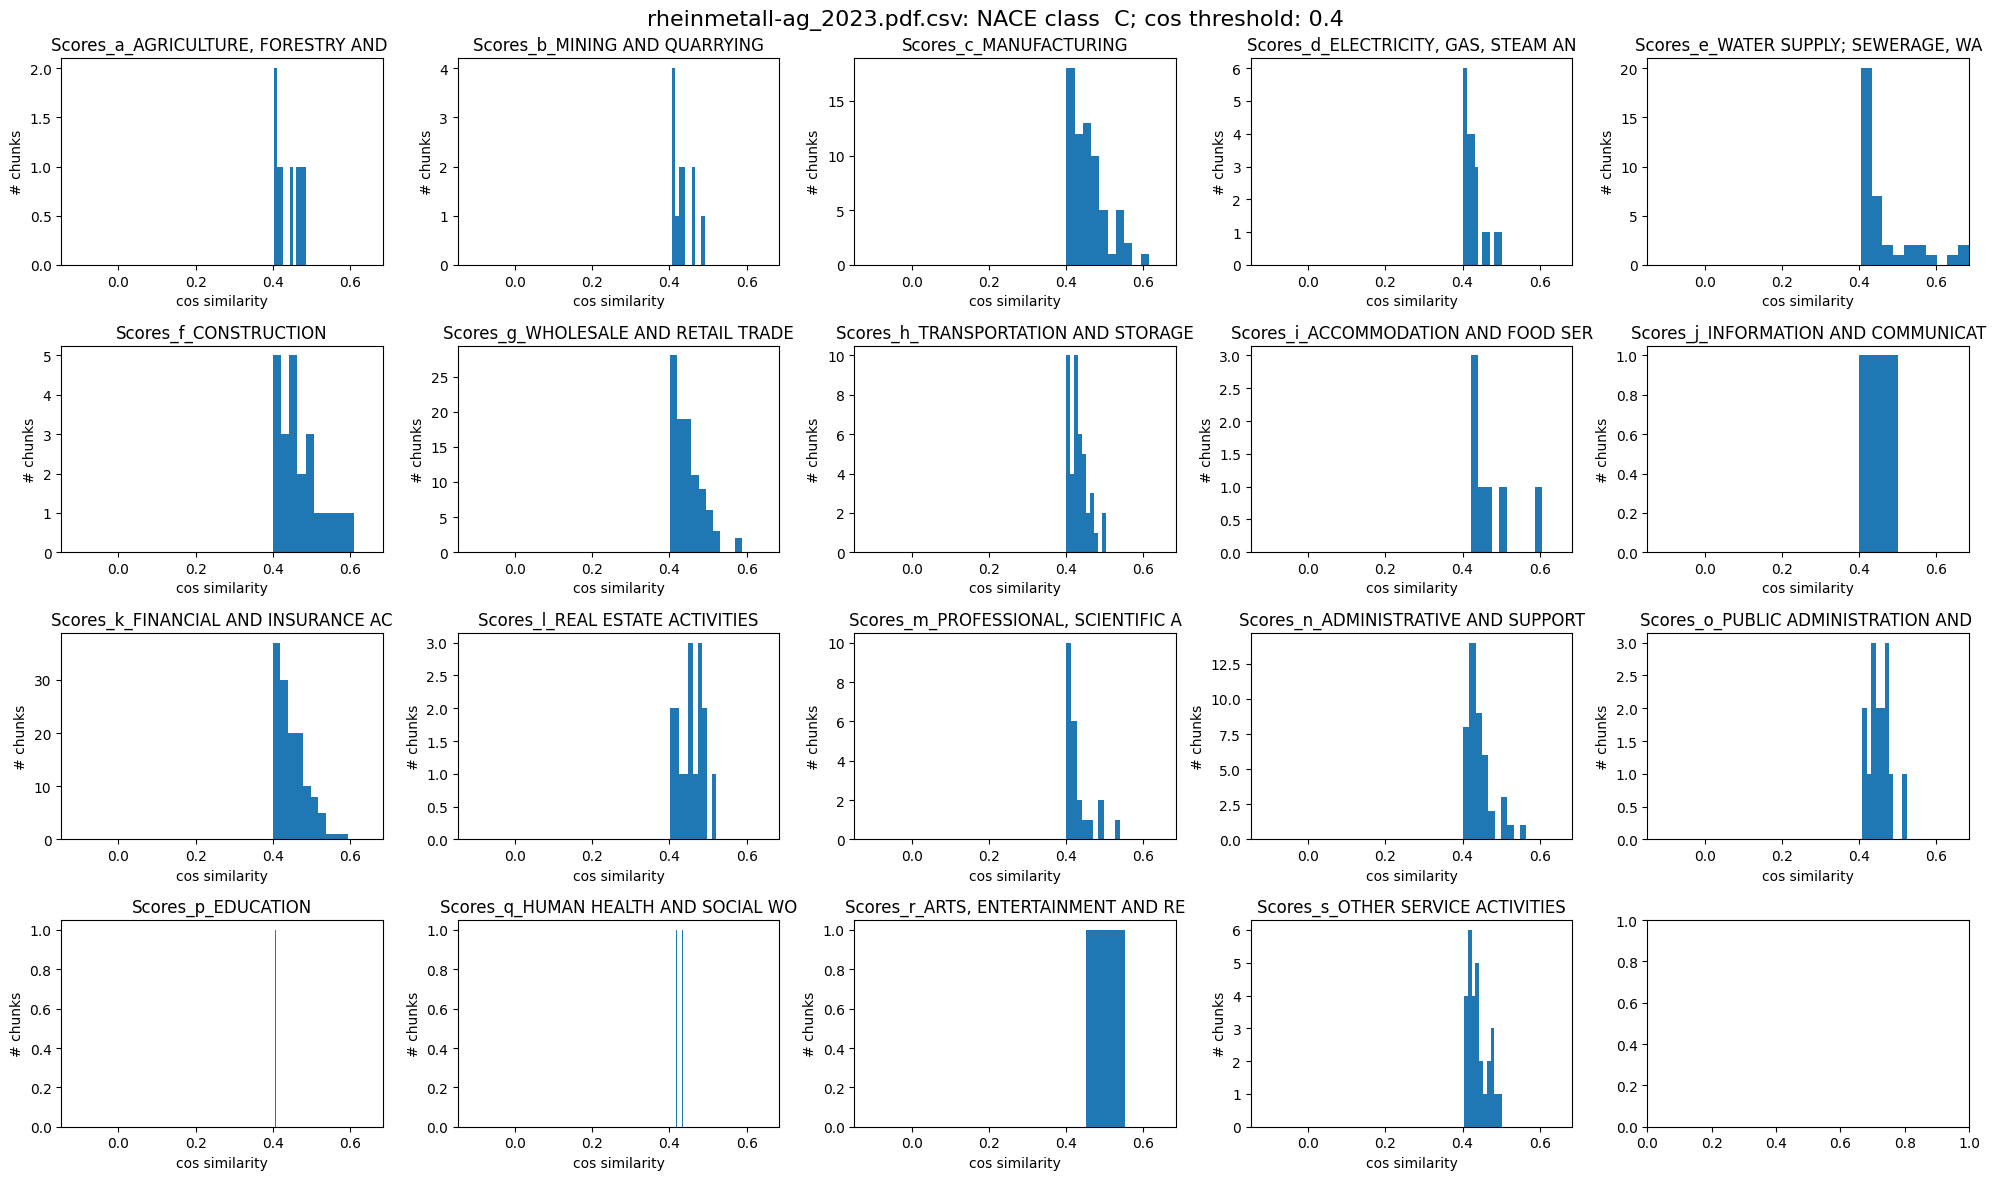

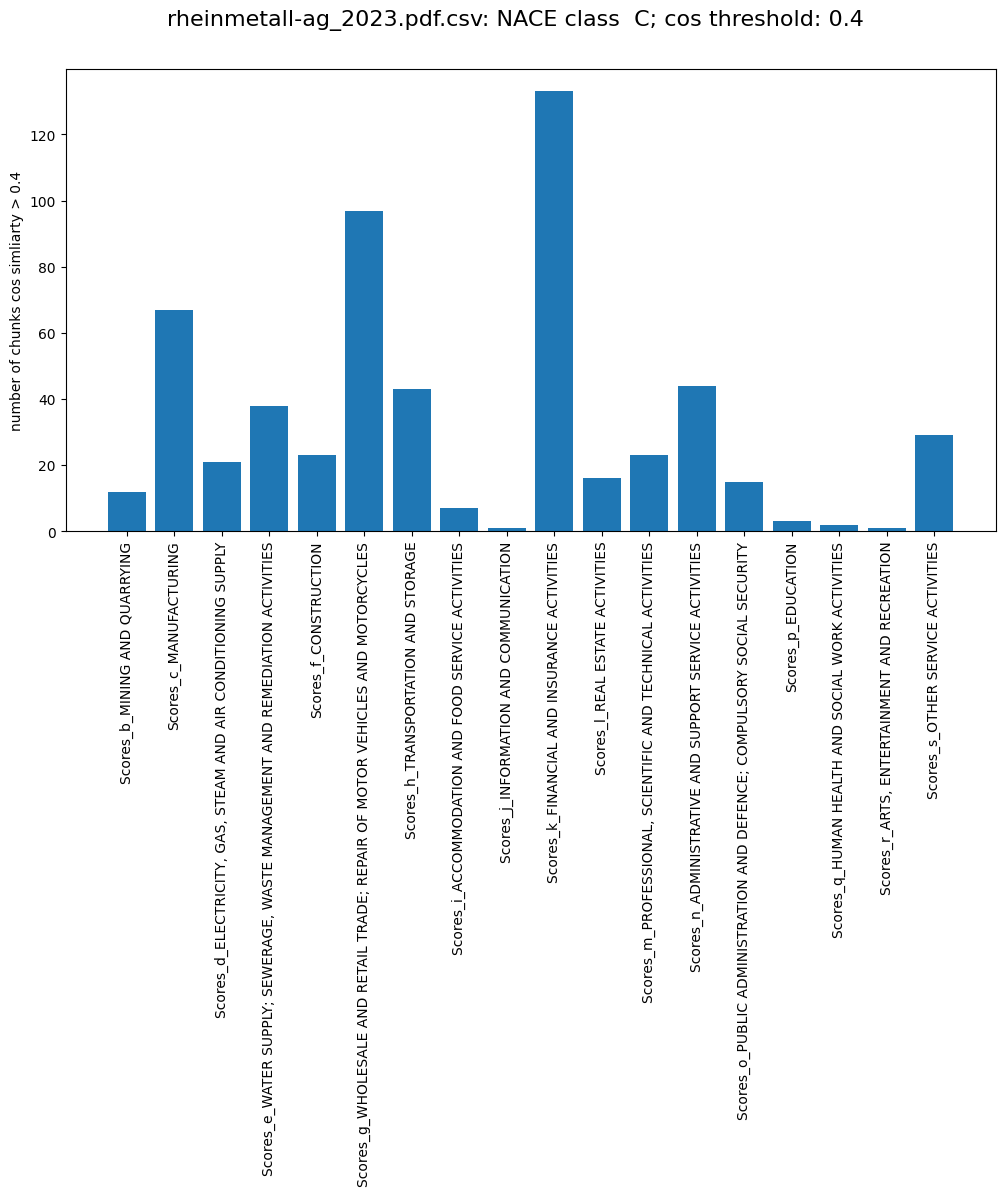

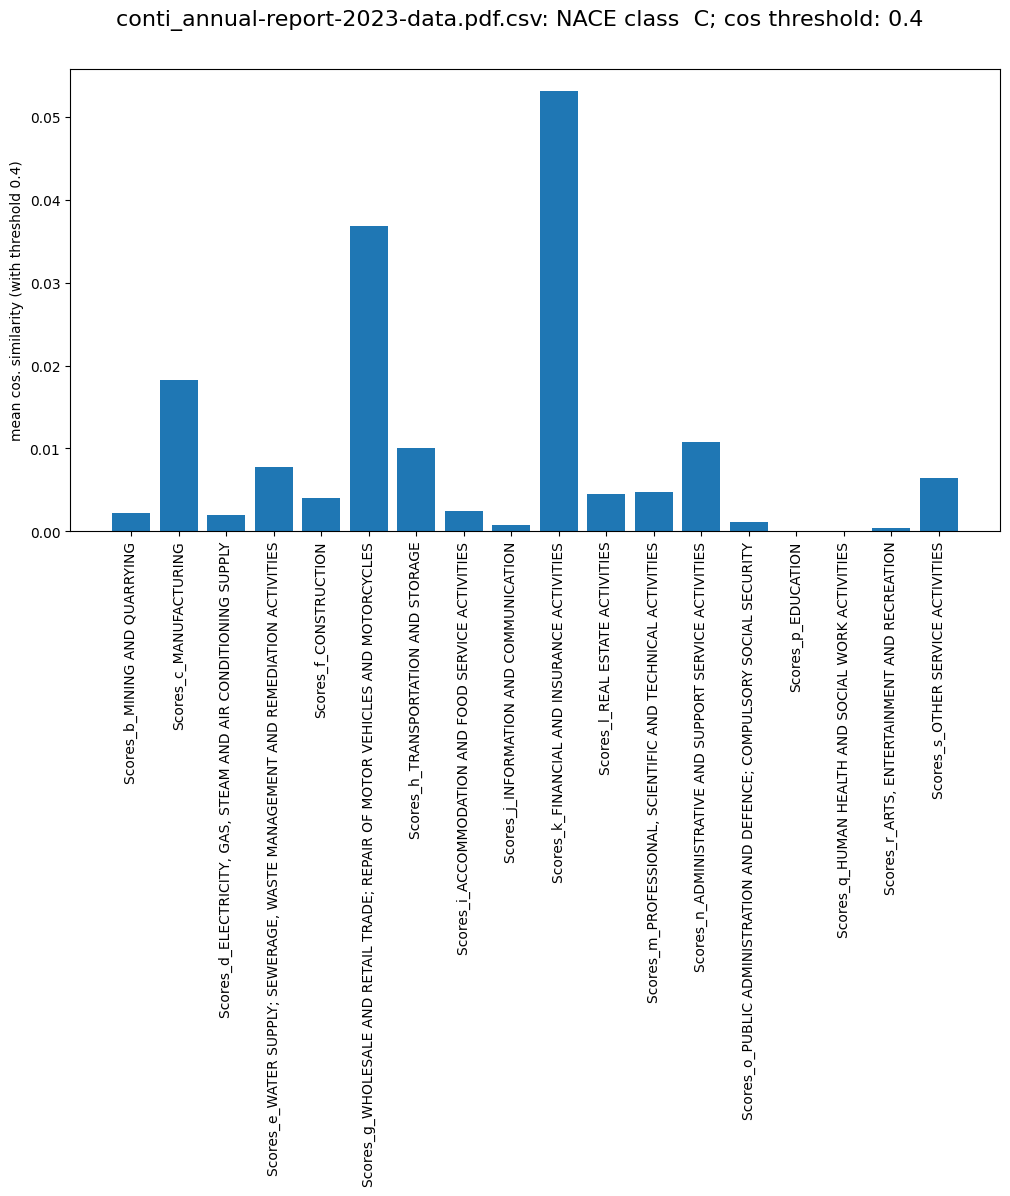

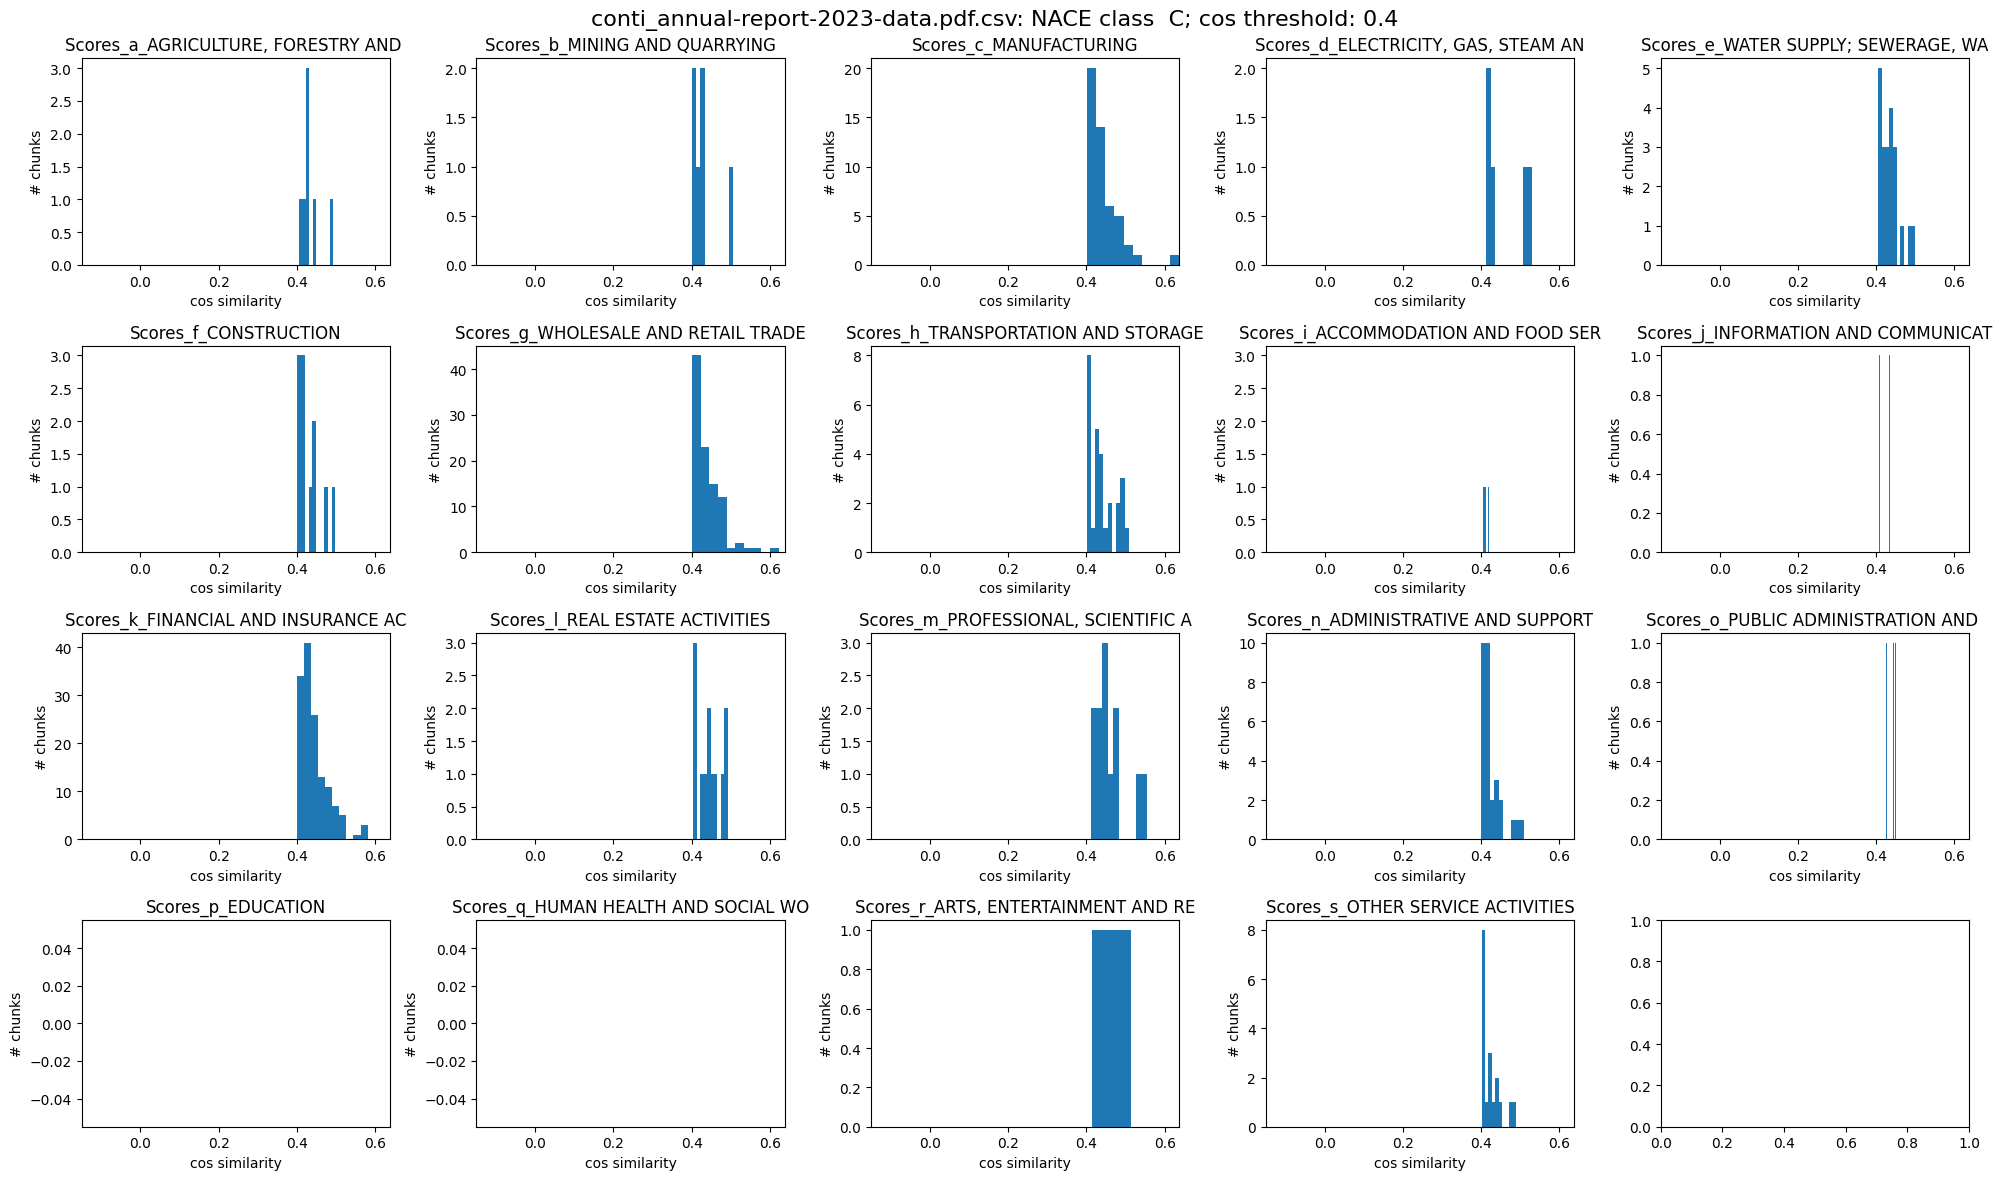

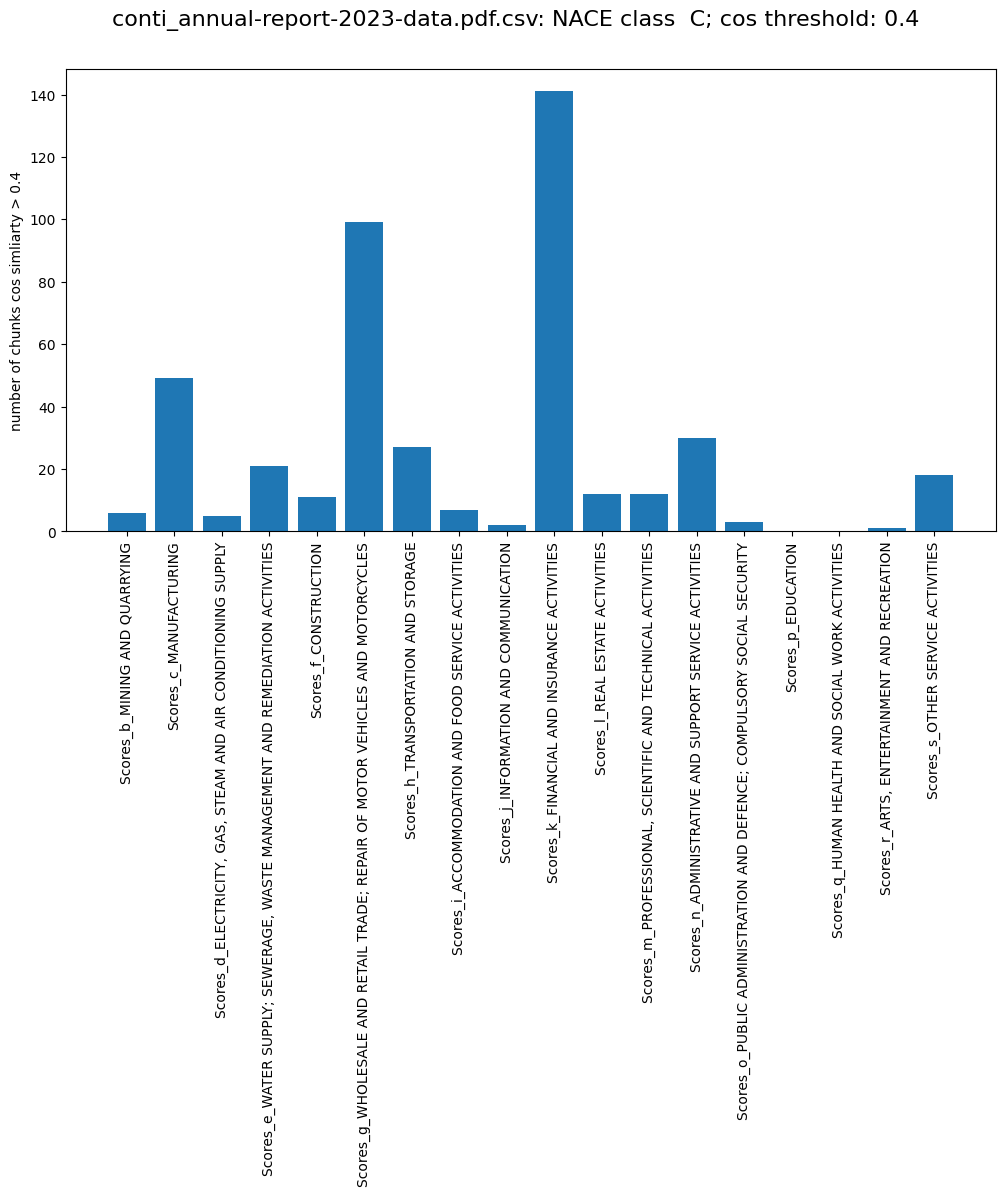

In [8]:
res = test_base.test_similarities(reports_path, preprocess_report, threshold_min_chunk_len, cos_threshold, report_to_nace_class, result_path)